# Lending Case Study

-*Problem Statemen*  
**Objectiv   **Understanding the Datat**  - **Dataset Attrib** 
- **Dataset Row Anais**
- **Dataset Column Anal
s* 
- **Handling Missiata  
- **Handling **  
```tliersaset for insights.


## 1.1 Problem Statement

Lending Club, a consumer finance marketplace offering various loans to urban customers, faces a significant challenge in managing its loan approval process. When evaluating loan applications, the company must make careful decisions to minimize financial losses, particularly stemming from loans extended to "risky" applicants. These financial losses, known as credit losses, occur when borrowers fail to repay their loans or default. Borrowers labeled as "charged-off" are responsible for the most significant losses to the company.

The primary goal of this analysis is to help Lending Club reduce credit losses. This challenge arises from two potential scenarios:

- **Identifying Applicants Likely to Repay**: Approving loans for applicants who are likely to repay can generate profits for the company through interest payments. Rejecting such applicants means a loss of potential business.
- **Identifying Applicants Likely to Default**: Approving loans for applicants who are likely to default can lead to significant financial losses.

## 1.2 Objectives

The objective is to identify applicants at risk of defaulting on loans, enabling a reduction in credit losses. This will be achieved through exploratory data analysis (EDA) using the provided dataset. The company aims to understand the key factors (driver variables) behind loan defaults, allowing for better risk management and informed decision-making for future loan approvals.

## 1.3 Understanding the Dataset

The dataset contains information about past loan applicants and their "Charged Off" status. The goal is to uncover patterns indicating the likelihood of default, which can inform decisions such as:

- Loan denial
- Reducing loan amounts
- Offering loans to risky applicants at higher interest rates

This dataset only includes approved loans and does not contain information about rejected loan applications. The key task is to identify significant variables contributing to loan defaults. 

The loan process involves three steps:
1. **Loan Request**: Borrower requests a loan amount (`loan_amnt`).
2. **Approval Decision**: The approver decides on the loan amount based on historical data and risk assessment (`funded_amnt`).
3. **Investor Decision**: The investor determines the final loan amount offered (`funded_amnt_inv`).

## 1.4 Dataset Attributes

### Primary Attribute: Loan Status
The principal attribute of interest is the **loan_status** column, which has three distinct values:
- **Fully-Paid**: Customers who have successfully repaid their loans.
- **Charged-Off**: Customers who have defaulted on their loans.
- **Current**: Customers with loans in progress, making it difficult to assess future defaults.

For this case study, rows with "Current" status will be excluded.

### Loan Acceptance Outcome
There are three possible scenarios for loan outcomes:
- **Fully Paid**: The loan principal and interest have been fully repaid.
- **Current**: The loan is still being repaid, and its future status is unknown.
- **Charged-Off**: The loan is in default due to non-payment over an extended period.

### Key Columns of Significance
Key predictors include customer demographics and loan characteristics, such as:

- **Customer Demographics**:
  - **Annual Income**: Higher income generally improves approval chances.
  - **Home Ownership**: Homeowners may be more likely to receive approval due to collateral.
  - **Employment Length**: Longer employment durations are indicative of financial stability.
  - **Debt to Income (DTI)**: Lower DTI generally increases approval chances.
  - **State**: The applicant's location may reveal trends related to loan defaults.

- **Loan Characteristics**:
  - **Loan Amount**: The amount of money requested.
  - **Grade**: A credit rating assigned to the borrower.
  - **Term**: Loan duration, often in months.
  - **Purpose**: The reason for the loan, e.g., debt consolidation, home improvement.
  - **Verification Status**: Indicates whether the borrower's income has been verified.
  - **Interest Rate**: The annual rate charged on the loan.
  - **Installment**: Monthly repayment amount.

### Excluded Columns
Certain columns, like customer behavior post-loan approval, will not be considered in the analysis. These include:

- **Customer Behavior**: Data on behavior after loan approval, such as repayment history or loan status updates.
- **Granular Data**: Detailed columns (e.g., sub-grade) will be omitted for simplicity.
- **Non-contributing Data**: Columns such as `id`, `member_id`, and descriptive text columns will be dropped.

## 1.5 Dataset Row Analysis

- **Dropping Rows with "Current" Status**: Rows with a "loan_status" of "Current" will be excluded as these represent loans still in progress.
- **Identifying and Removing Duplicates**: Duplicate rows will be identified and removed.
- **Removing Unnecessary Columns**: Columns with only NA values or single-value columns will be removed.

## 1.6 Dataset Column Analysis

### Dropping Columns
Several columns will be excluded from the analysis due to missing values or irrelevance, including:

- **Columns with NA values**: Columns with only NA values will be dropped.
- **Columns with constant values**: Columns with a single value across all rows will be dropped.
- **Columns with excessive missing data**: Columns with over 65% missing data will be excluded.
  
### Converting Column Format
Some columns will be converted to appropriate formats:
- **Currency and numerical columns** (e.g., `loan_amnt`, `int_rate`) will be converted to float.
- **Percentage columns** will have the "%" sign stripped and converted to float.
- **Date columns** will be converted to datetime format.

### Standardizing Values
- **Home Ownership**: Values like "NONE" and "OTHER" will be standardized to "OTHER".
- **Verification Status**: Similar values like "Source Verified" and "Verified" will be standardized to "Verified".

### Adding New Columns
New columns will be added for better analysis:
- **issue_y**: Year of loan issue.
- **issue_m**: Month of loan issue.
- **issue_q**: Quarter of loan issue.
- **loan_paid**: Simple mapping of loan status (Yes/No).
- **dti_bucket, loan_amnt_bucket**: Binned columns for DTI, loan amount, funded amount, etc.

## 1.7 Handling Missing Data

- **Dropping Columns**: Columns with more than 65% missing data will be dropped.
- **Removing Rows**: Rows with over 65% missing data will be removed.
- **Imputation**: Columns with less missing data will undergo imputation to fill the missing values.

## 1.8 Handling Outliers

Outliers will be removed from specific columns, including:
- **loan_amnt**, **funded_amnt**, **int_rate**, **annual_inc**, **dti**.

This process ensures that extreme values do not distort the analysis.

## 2. Data Cleaning and Manipulation

### 2.1 Loading Data from Loan CSV

### 2.2 Checking for Null Values in the Dataset

### 2.3 Checking for Unique Values

### 2.4 Checking for Duplicated Rows in Data

### 2.5 Dropping Records

### 2.6 Common Functions

### 2.7 Data Conversion

### 2.8 Outlier Treatment

### 2.9 Imputing Values in Columns


In [2]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2.1. Loading data from loan CSV

In [3]:
# Load the dataset
data = pd.read_csv('C:/Users/4270/Documents/CaseStudy/Data/loan.csv')
data

C:\Users\4270\AppData\Local\Temp\ipykernel_21732\835409340.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('C:/Users/4270/Documents/CaseStudy/Data/loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Check the dataset
print(data.head())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [6]:
print(data.describe())

                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%   

In [7]:
data.shape

(39717, 111)

### 2.2. Checking for null values in the dataset
Steps to Understand the Dataset with pandas
Using data.head(), data.info(), data.describe(), and data.shape, I can gain essential insights into the dataset for analysis and cleaning.

In [8]:
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

Several columns contain only null values, which do not contribute to our analysis, so we will remove them.

In [9]:
data.dropna(axis = 1, how = 'all', inplace = True)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


### 2.3. Checking for unique values

- If a column contains only a single unique value, it provides no variability or meaningful information for data analysis. 
- Such columns do not contribute to understanding patterns, trends, or differences in the dataset. 
- Hence, these columns should be identified and removed from the dataset to streamline the analysis and avoid unnecessary computations.

In [10]:
remove_columns_list = []
for i in data.columns:
    # Check if unique value count is 1
    if data[i].nunique() == 1:
        remove_columns_list.append(i)
    

# Remove those columns
data.drop(remove_columns_list, axis = 1, inplace = True)

In [11]:
data.shape

(39717, 48)

### 2.4. Checking for duplicated rows in data
- When performing data analysis on a loan dataset, entries where loan_status = 'Current' indicate loans that are still active and have not reached a conclusion (e.g., fully paid or defaulted).
- These records cannot provide insights into the borrower's likelihood of default since their final status is unknown.
- Removing such records ensures the dataset focuses on completed loans, making it more suitable for predictive modeling or analysis.

In [12]:
data[data.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies


### 2.5 Dropping records
Dropping records where loan_status = 'Current'
The loan in progress cannot provide us insights as to whether the borrower is likely to default or not. Hence, dropping those records

In [13]:
data = data[data['loan_status'].str.lower() != "current"]
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,NaN,Jan-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,NaN,Jun-10,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,NaN,Jul-10,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,NaN,Jun-07,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,NaN,Jun-07,NaN


#- Identifying duplicate rows in the dataset

Removing columns with 70% or more missing data to avoid skewing the analysis

In [14]:
for col in data.columns:
    missing_values = round(data[col].isna().sum() / data.shape[0], 2)
    if missing_values >= 0.7:
        data.drop(col, axis = 1, inplace = True)
        
data.shape

C:\Users\4270\AppData\Local\Temp\ipykernel_21732\864833988.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(col, axis = 1, inplace = True)
C:\Users\4270\AppData\Local\Temp\ipykernel_21732\864833988.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(col, axis = 1, inplace = True)


(38577, 46)

- Eliminating non-contributory text-based columns such as `desc`, `emp_title`, `id`, `member_id`, `title`, `url`, `zip_code`, etc., as they do not influence loan outcomes.

In [15]:
# List the columns which are not required for the analysis. Total 27 columns
drop_cols = [
 'collection_recovery_fee',
 'delinq_2yrs',
 'desc',
 'earliest_cr_line',
 'emp_title',
 'id',
 'inq_last_6mths',
 'last_credit_pull_d',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'member_id',
 'out_prncp',
 'out_prncp_inv',
 'pub_rec',
 'recoveries',
 'revol_bal',
 'title',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_late_fee',
 'total_rec_prncp',
 'url',
 'zip_code',
 'mths_since_last_delinq'
]

data.drop(drop_cols, axis = 1, inplace = True)

C:\Users\4270\AppData\Local\Temp\ipykernel_21732\617390763.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(drop_cols, axis = 1, inplace = True)


In [16]:
data.shape

(38577, 21)

- Understanding the data type and conversion to process the data
- Conververtion of object to float

In [17]:
data.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
open_acc                  int64
revol_util               object
total_acc                 int64
pub_rec_bankruptcies    float64
dtype: object

### Data Conversion
- Checking for missing values

In [18]:
(data.isna().sum()/len(data.index))*100

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
addr_state              0.000000
dti                     0.000000
open_acc                0.000000
revol_util              0.129611
total_acc               0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

#- Handling Missing values
columns with missing values are "emp_length", "revol_util"s.

In [19]:
print("Mode : " + data.emp_length.mode()[0])
data.emp_length.value_counts()

Mode : 10+ years


emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

### Imputing values in Columns
- Aove value counts shows that the mode value has far higher frequency than that of the next most frequent value.
- This means that we can safely assign the value of mode to the null values in the column- 
Also the missing valu for column revol_utiles are in very low percentage


In [20]:
data.emp_length.fillna(data.emp_length.mode()[0], inplace = True)
data.emp_length.isna().sum()

C:\Users\4270\AppData\Local\Temp\ipykernel_21732\2432453322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.emp_length.fillna(data.emp_length.mode()[0], inplace = True)


0

In [21]:
data.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
data.revol_util.isna().sum()

C:\Users\4270\AppData\Local\Temp\ipykernel_21732\2371151875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(axis = 0, subset = ['revol_util'] , inplace = True)


0

In [22]:
data = data[data.pub_rec_bankruptcies.notna()]

#- Standardizing the data
"revol_util" column although described as an object column, it has continous values.
So we need to standardize the data in this column
"int_rate" is one such column.
"emp_length" --> { (< 1 year) is assumed as 0 and 10+ years is assumed as 10 }
Although the datatype of "term" is arguable to be an integer, there are only two values in the whole column and it might as well be declared a categorical variable.

In [23]:
data = data.astype({
    'funded_amnt' : 'float',
    'funded_amnt_inv' : 'float',
    'loan_amnt' : 'float',
})

In [24]:
# Convert term column to int type
data['term'] = data['term'].apply(lambda x: int(x.replace('months', '').strip()))

In [25]:
# Convert int_rate column to float type
data['int_rate'] = data['int_rate'].apply(lambda x: float(x.replace('%', '').strip()))

In [26]:
data.emp_length = pd.to_numeric(data.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [27]:
# Convert revol_util column to float type
data['revol_util'] = data['revol_util'].apply(lambda x: float(x.replace('%', '').strip()))

In [28]:
# Rounding of the values of below columns to two decimal places
for col in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']:
    data[col] = data[col].apply(lambda x: round(x, 2))

##- Convert loan date (issue_d) to DateTime (format: yyyy-mm-dd)

In [29]:
# Converting the column issue_d from string to DateTime
data['issue_d'] = pd.to_datetime(data['issue_d'], format = '%b-%y')

In [30]:
data.dtypes

loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                             int64
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                       int64
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
addr_state                      object
dti                            float64
open_acc                         int64
revol_util                     float64
total_acc                        int64
pub_rec_bankruptcies           float64
dtype: object

### Outlier Treatment

<Axes: >

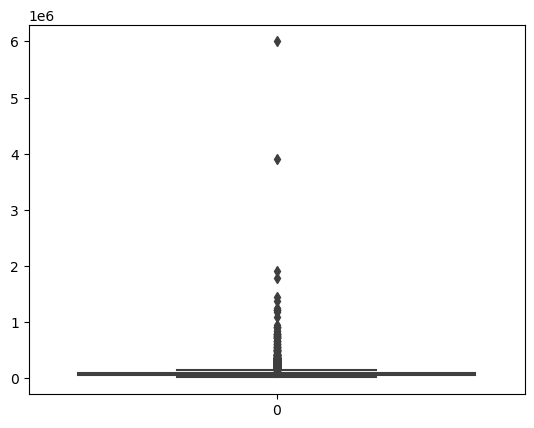

In [31]:
sns.boxplot(data['annual_inc'])

#- Outliers detected: Removing them.

By examining quantile information, values beyond the 95th percentile appear disconnected from the general distribution, with significant increases for small variations in quantiles. Thus, we set the threshold for outlier removal at the 95th percentile.

In [32]:
quantile_info = data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    186000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [33]:
per_95_annual_inc = data['annual_inc'].quantile(0.95)
data = data[data.annual_inc <= per_95_annual_inc]

<Axes: >

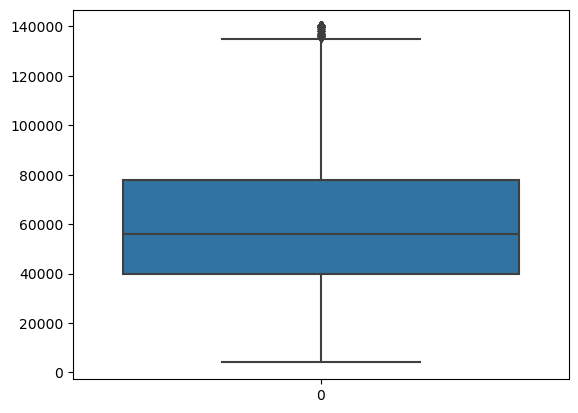

In [34]:
sns.boxplot(data.annual_inc)

#- The 'annual_inc' data now appears clean. Moving forward, we will analyze other numerical variables that may contain outliers, including:  

- `dti`  
- `loan_amnt`  
- `funded_amnt_inv`  

Let's examine these variables and take appropriate action if necesary."

<Axes: >

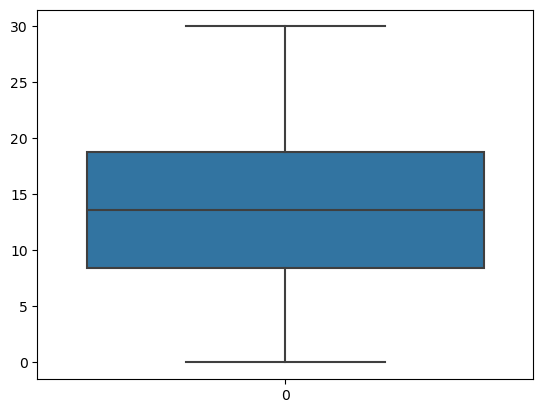

In [35]:
sns.boxplot(data.dti)

<Axes: >

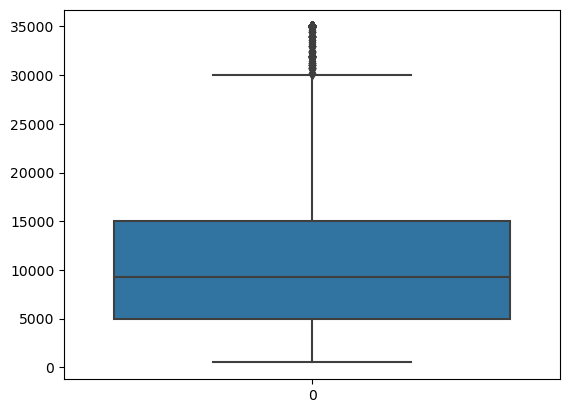

In [36]:
sns.boxplot(data.loan_amnt)

In [37]:
data.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    20000.0
0.950    25000.0
0.970    25975.0
0.975    28000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

<Axes: >

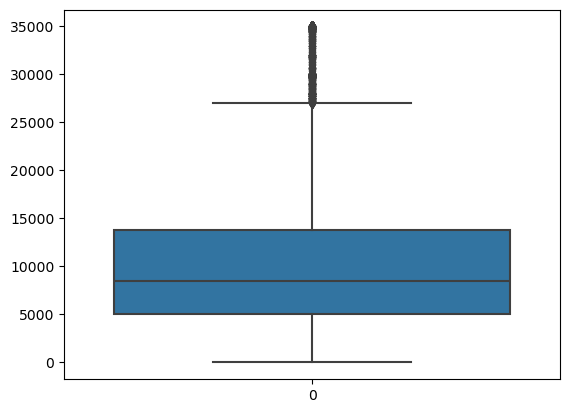

In [38]:
sns.boxplot(data.funded_amnt_inv)

- The annual income of most loan applicants is between **$40,000 - $75,000 USD**.  
- The loan amount of most loan applicants is between **$5,000 - $15,000 USD**.  
- The funded amount of most loan applicants is between **$5,000 - $14,000 USD**.  
- The funded amount by investors for most loan applicants is between **$5,000 - $14,000 USD**.  
- The interest rate on the loan is between **9% - 14%**.  
- The monthly installment amount on the loan is between **$160 - $440 USD**.  
- The debt-to-income ratio is between **8 - 18**.  


In [39]:
data.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     8500.0
0.750    13800.0
0.900    19800.0
0.950    23975.0
0.970    24975.0
0.975    25600.0
0.980    27975.0
0.985    29950.0
0.990    32000.0
1.000    35000.0
Name: funded_amnt_inv, dtype: float64

##- Although some values are distant from the main distribution, the data shows a relatively continuous pattern. Therefore, there is no need to remove outliers or extreme values for the columns mentioned above.

### Common Functions

In [40]:
# Extracting Month and Year for analysis from issue_d
data['issue_m'] = pd.DatetimeIndex(data['issue_d']).month
data['issue_y'] = pd.DatetimeIndex(data['issue_d']).year

In [41]:
def bucket_data(column, thresholds, labels) -> str:
    """
    Bucket data based on specified thresholds and labels.

    Parameters:
        column (float): The numeric value to be bucketed.
        thresholds (list of float): The list of threshold values for bucketing.
        labels (list of str): The list of labels corresponding to the buckets.

    Returns:
        str: The bucket label for the given column value.
    """
    for i, threshold in enumerate(thresholds):
        if column < threshold:
            return labels[i]
    return labels[-1]

In [42]:
def plot_histogram(data, column, bins=10, title=None, xlabel=None, ylabel=None, figsize=(8, 6)):
    """
    Create a histogram using Seaborn's histplot for a specified column in a DataFrame or Series.

    Parameters:
        data (pd.DataFrame or pd.Series): The data to be plotted.
        column (str): The name of the column or Series to be plotted.
        bins (int, optional): The number of bins in the histogram. Default is 10.
        title (str, optional): The title of the plot. Default is None.
        xlabel (str, optional): Label for the x-axis. Default is None.
        ylabel (str, optional): Label for the y-axis. Default is None.
        figsize (tuple, optional): Figure size in inches (width, height). Default is (8, 6).

    Returns:
        None
    """
    # Set the style
    sns.set(style="whitegrid")

    # Create the histogram
    plt.figure(figsize=figsize)
    sns.histplot(data=data, x=column, bins=bins, kde=True)

    # Set title and labels
    if title:
        plt.title(title, fontsize=14)
    if xlabel:
        plt.xlabel(xlabel, fontsize=12)
    if ylabel:
        plt.ylabel(ylabel, fontsize=12)

    # Show the plot
    plt.show()

In [43]:
def countplot_graph(data_dict: dict, annot=True) -> None:
    """
    Create a countplot graph.

    Args:
        data_dict (dict): A dictionary containing the following keys:
            - 'data' (DataFrame): The DataFrame containing the data.
            - 'x' (str): The column to be plotted on the x-axis.
            - 'figsize' (tuple, optional): Size of the figure in (x, y) format.
            - 'hue' (str, optional): The column to be used for color differentiation (default None).
            - 'order' (list, optional): Order of categorical values on the x-axis (default None).
            - 'xlabel' (str, optional): Label for the x-axis (default None).
            - 'ylabel' (str, optional): Label for the y-axis (default None).
            - 'title' (str, optional): Title for the plot (default None).
            - 'palette' (list, optional): List of colors for the plot (default None).
            - 'x_tick_rotation' (int, optional): Rotation value for x-axis ticks.
        annot (bool): Boolean flag to show or hide annotations. Default is True.

    Returns:
        None
    """
    df = data_dict['data']
    x = data_dict['x']
    figsize = data_dict['figsize']
    hue = data_dict.get('hue')
    order = data_dict.get('order')
    x_tick_rotation = data_dict.get('x_tick_rotation')
    xlabel = data_dict.get('xlabel')
    ylabel = data_dict.get('ylabel')
    title = data_dict.get('title')
    palette = data_dict.get('palette')

    fig, ax = plt.subplots(figsize=figsize, dpi=100)

    sns.countplot(x=x, hue=hue, data=df, order=order, palette=palette)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    if annot:
        for p in ax.patches:
            ax.annotate('{:1}'.format(p.get_height()), (p.get_x() + 0.1, p.get_height() + 10))

    ax.set_title(title)
    
    if x_tick_rotation:
        plt.xticks(rotation=x_tick_rotation)

    plt.show()


In [44]:
def plot_charged_off_percentage(df, column, stacked=False):
    """
    Calculate and plot the Charged Off percentage and the number of loans for a specified column.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        column (str): The column for which to calculate and plot Charged Off percentage.
        stacked (bool, optional): Whether to create a stacked bar plot (default: False).

    Returns:
        None
    """
    # Calculate Charged Off percentage
    charged_off_data = pd.crosstab(df[column], df['loan_status'], margins=True)
    charged_off_data['Total'] = charged_off_data['Charged Off'] + charged_off_data['Fully Paid']
    charged_off_data['Charged Off %'] = round((charged_off_data['Charged Off'] * 100 / charged_off_data['Total']), 2)
    # Remove the last row with sum total
    charged_off_data = charged_off_data[0:-1]

    # Plot
    fig, ax1 = plt.subplots(figsize=(20, 8))

    # Line plot for Charged Off Percentage
    charged_off_plot = charged_off_data[['Charged Off %']]
    line = charged_off_plot.plot(ax=ax1, marker='o', color='r', lw=2)
    line.set_title(column.title() + ' vs Charged Off %', fontsize=20, weight="bold")
    line.set_xlabel(column.title())
    line.set_ylabel('Charged Off %')

    # Bar plot for Number of Loans
    loans_plot = charged_off_data.iloc[:, 0:3]
    ax2 = loans_plot.plot(kind='bar', ax=ax1, rot=1, secondary_y=True, stacked=stacked)
    ax2.set_ylabel('Number of Loans')
    
    plt.show()

## 3. Data Analysis
1. Derived Columns
2. Univariate Analysis (including Segmented Univariate Analysis)
3. Bivariate Analysis

### 3.1. Derived Columns
1. Derived metrics for Month (issue_m), Year (issue_y) and Quarter (issue_q) from column "issue_d"
2. Create new column loan_paid with 'Yes' and 'No' values based on loan_status column where 'Yes' = "Fully Paid" and 'No' = "Charged off"
3. Creating different buckets for loan amount (loan_amount_bucket), interest rate (interest_rate_bucket), annual income (annual_income_bucket)

#### 3.1.1. Derived metrics for Month (issue_m), Year (issue_y) and Quarter (issue_q) from column "issue_d"

In [45]:
# Extracting Month and Year for analysis from issue_d
data['issue_m'] = pd.DatetimeIndex(data['issue_d']).month
data['issue_y'] = pd.DatetimeIndex(data['issue_d']).year

In [46]:
# Categorising Months into quaterly buckets
threshold_months = [4, 7, 9]
quarter_labels = ['Q1', 'Q2', 'Q3', 'Q4']
data['issue_q'] = data['issue_m'].apply(bucket_data, args=(threshold_months, quarter_labels))

In [47]:
data[['issue_d', 'issue_m', 'issue_q']]

,issue_d,issue_m,issue_q
0,2011-12-01,12,Q4
1,2011-12-01,12,Q4
2,2011-12-01,12,Q4
3,2011-12-01,12,Q4
5,2011-12-01,12,Q4
...,...,...,...
39562,2007-11-01,11,Q4
39573,2007-11-01,11,Q4
39623,2007-10-01,10,Q4
39666,2007-08-01,8,Q3


In [48]:
#creating bins for int_rate,open_acc,revol_util,total_acc
data['int_rate_groups'] = pd.cut(data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
data['open_acc_groups'] = pd.cut(data['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
data['revol_util_groups'] = pd.cut(data['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
data['total_acc_groups'] = pd.cut(data['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
data['annual_inc_groups'] = pd.cut(data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

##- Visualizing Categorical Data:  
- `
Since we already have the `grade` column, we will extract only the numerical level value from the `sub_grade` variable for better analysis`  - `

For the plots below, we are focusing exclusively on defaulters. Hence, we will subset the data to include only records where `loan_status` is 'Charged Off' while creating these visualizati`ns."

### 3.2 Univariate Analysis

Following fields will be checked as part of univariate analysis

#### 1. Categorical variables
    1. Ordered categorical data
    2. Unordered categorical data
     
#### 2. Quantitative variables
       

#### 3.2.1.1. Ordered Categorical Variables

<Axes: xlabel='loan_status', ylabel='count'>

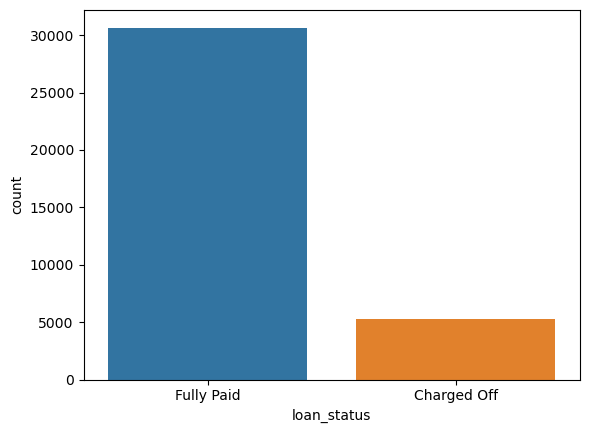

In [49]:
sns.countplot(x = 'loan_status', data = data)

In [50]:
data.sub_grade = pd.to_numeric(data.sub_grade.apply(lambda x : x[-1]))
data.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

AttributeError: 'numpy.int64' object has no attribute 'startswith'

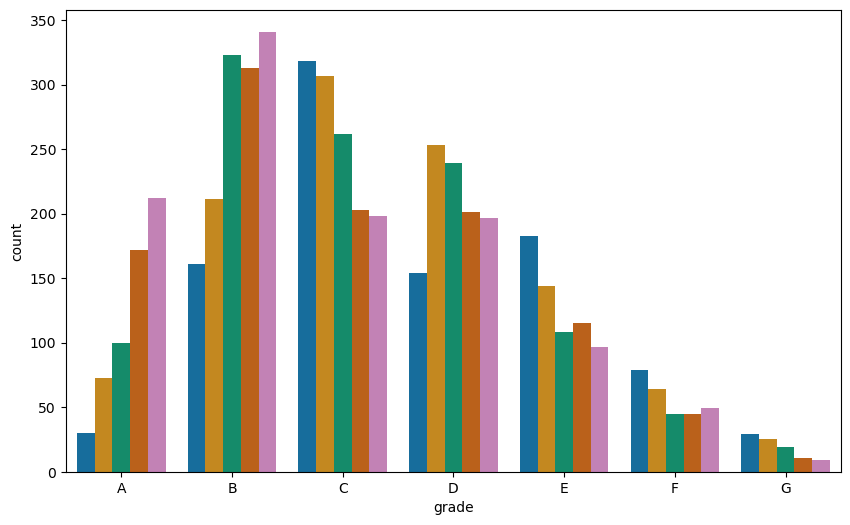

In [51]:
fig, ax = plt.subplots(figsize=(10,6))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = data[data.loan_status == 'Charged Off'])

<Axes: xlabel='grade', ylabel='count'>

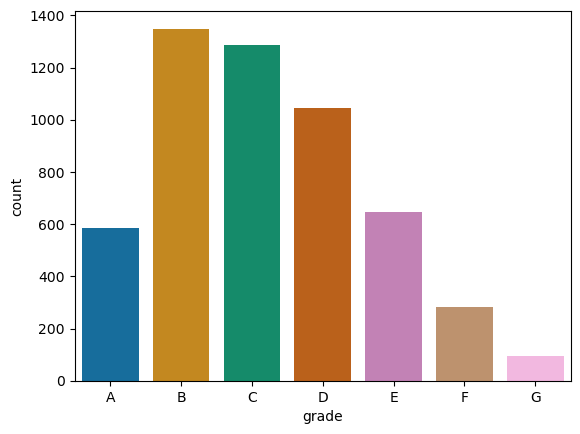

In [52]:
sns.countplot(x = 'grade', data = data[data.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

<Axes: xlabel='emp_length', ylabel='count'>

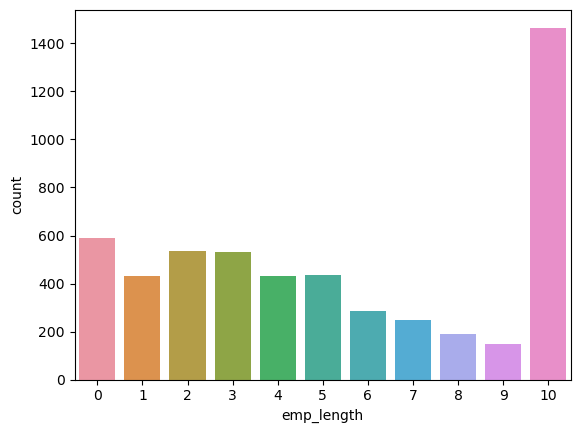

In [53]:
sns.countplot(x='emp_length', data=data[data.loan_status == 'Charged Off'])

<Axes: xlabel='issue_m', ylabel='count'>

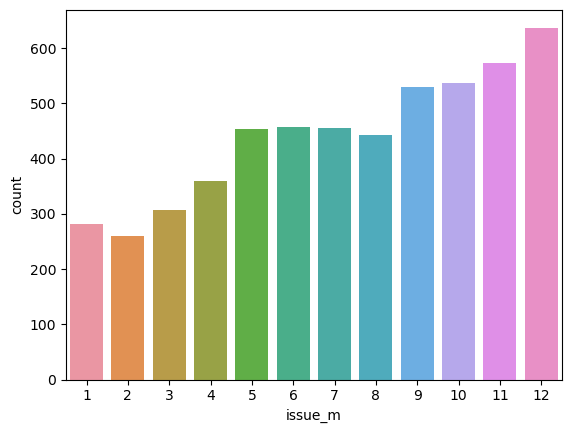

In [54]:
sns.countplot(x='issue_m', data=data[data['loan_status']=='Charged Off'])

<Axes: xlabel='issue_q', ylabel='count'>

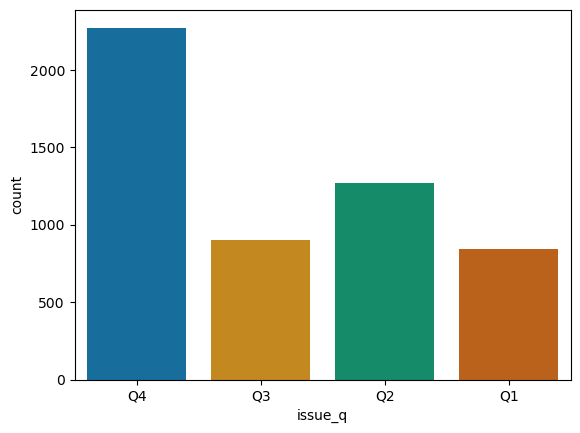

In [55]:
sns.countplot(x='issue_q', data=data[data['loan_status']=='Charged Off'])

<Axes: xlabel='count', ylabel='term'>

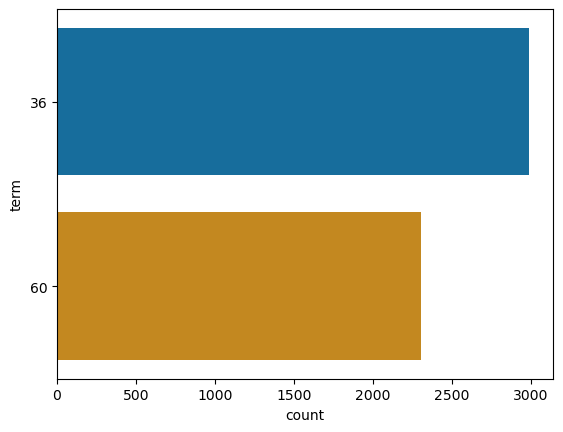

In [56]:
sns.countplot(y='term', data=data[data['loan_status']=='Charged Off'])

#### 3.2.1.2. Unordered Categorical Variables

##- Analyzing home_ownership

In [57]:
#checking unique values for home_ownership
data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

##- There are only 3 records with 'NONE' value in the data. So replacing the value with 'OTHER'

In [58]:
#replacing 'NONE' with 'OTHERS'
data['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

<Axes: xlabel='home_ownership', ylabel='count'>

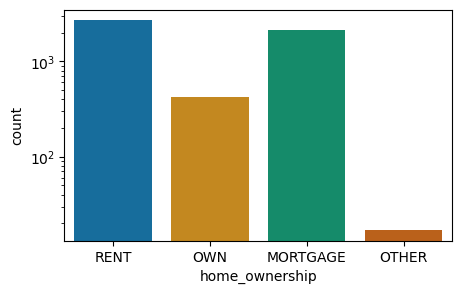

In [59]:
fig, ax = plt.subplots(figsize = (5,3))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=data[data['loan_status']=='Charged Off'])

#- Data Analysis

<Axes: xlabel='count', ylabel='purpose'>

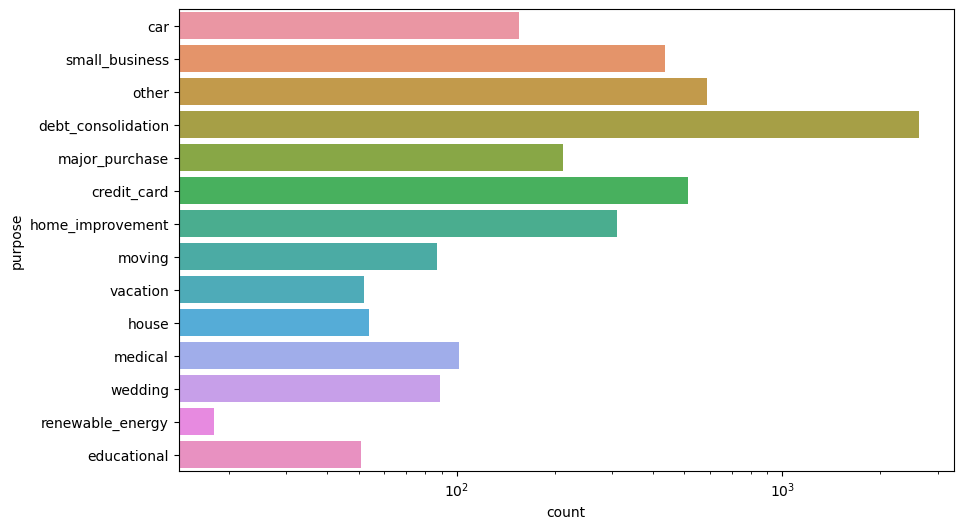

In [60]:
fig, ax = plt.subplots(figsize = (10,6))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=data[data.loan_status == 'Charged Off'])

#### 3.2.2. Quantitative variables

##- Analyzing interest rate wrt the interest rate bins created

C:\Users\4270\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='int_rate_groups', ylabel='count'>

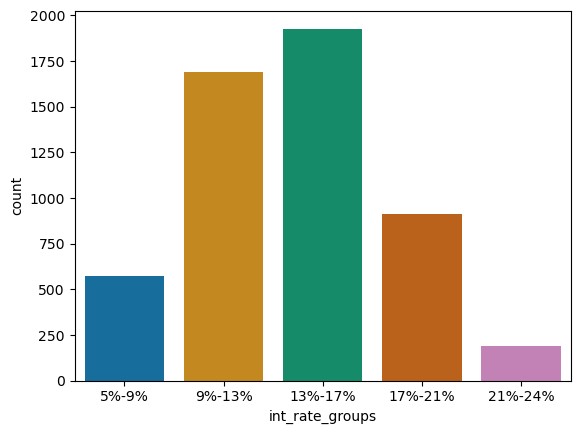

In [61]:
sns.countplot(x='int_rate_groups', data=data[data.loan_status == 'Charged Off'])

##- Similarly analyzing open_acc,revol_util,annual_inc

C:\Users\4270\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='open_acc_groups', ylabel='count'>

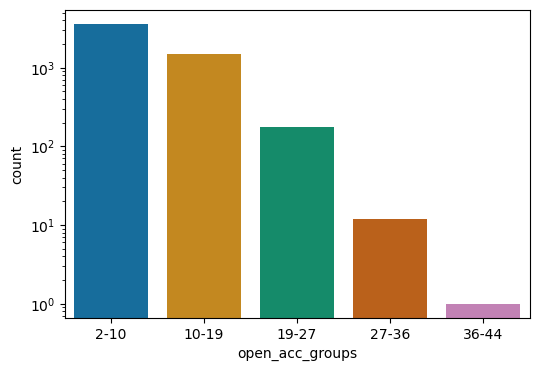

In [62]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set_yscale('log')
sns.countplot(x='open_acc_groups', data=data[data.loan_status == 'Charged Off'])

C:\Users\4270\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='revol_util_groups', ylabel='count'>

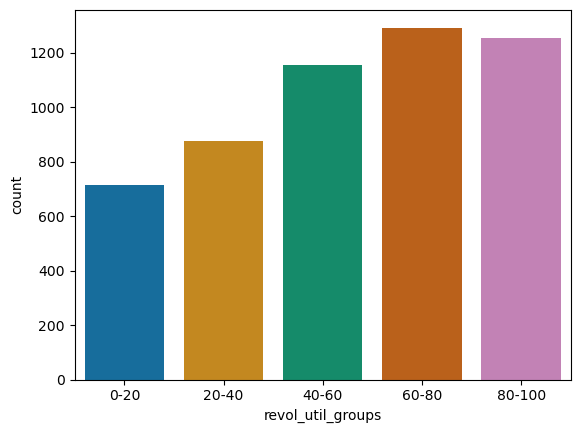

In [63]:
sns.countplot(x='revol_util_groups', data=data[data.loan_status == 'Charged Off'])

C:\Users\4270\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='annual_inc_groups', ylabel='count'>

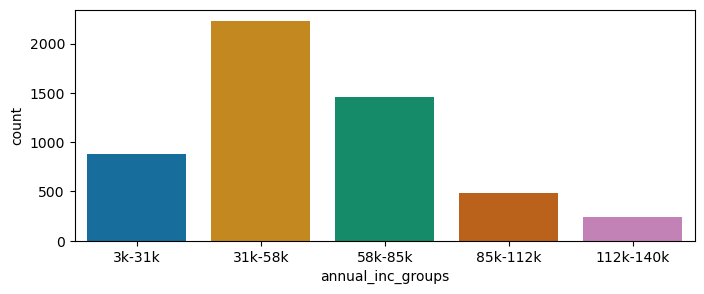

In [64]:
fig, ax = plt.subplots(figsize = (8,3))
sns.countplot(x='annual_inc_groups', data=data[data.loan_status == 'Charged Off'])

In [66]:
loan_status_map = {'Charged Off': 'No', 'Fully Paid': 'Yes' }
data['loan_paid'] = data['loan_status'].map(loan_status_map)

In [67]:
# Categorising Loan Amount
loan_amount_thresholds = [5000, 10000, 15000]
loan_amount_labels = ['0 - 5K', '5K - 10K', '10K - 15K', '15K - above']
data['loan_amnt_bucket'] = data['loan_amnt'].apply(bucket_data, args=(loan_amount_thresholds, loan_amount_labels))

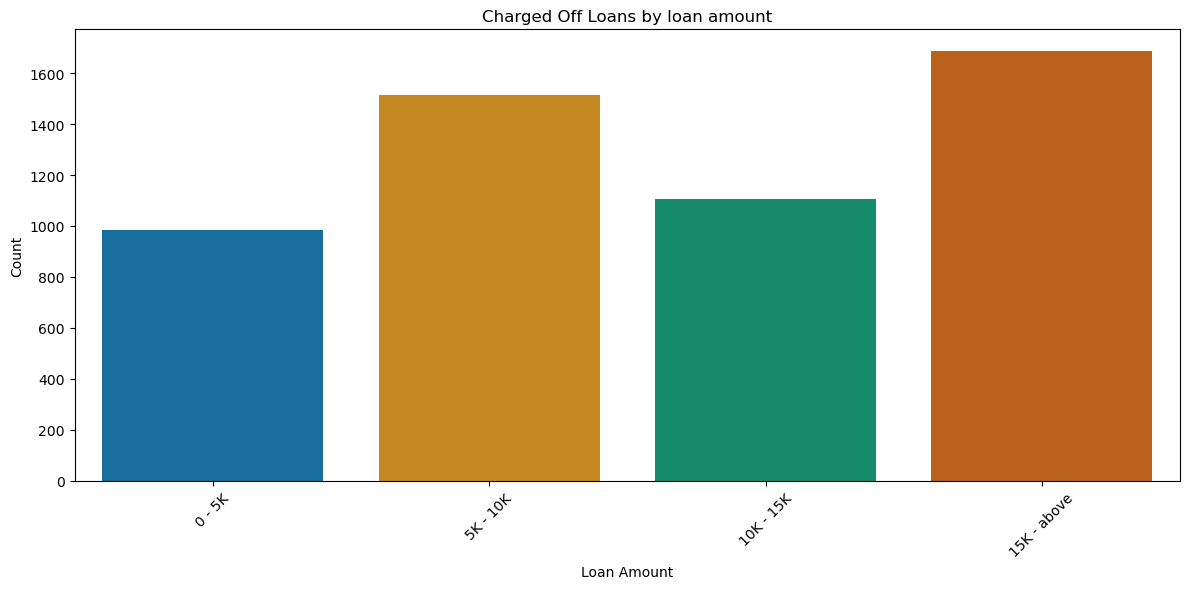

In [68]:
plt.figure(figsize=(12, 6))
sns.countplot(x='loan_amnt_bucket', data=data[data['loan_status'] == 'Charged Off'])
plt.title("Charged Off Loans by loan amount")  # Add a title
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.xlabel("Loan Amount")  # x-axis label
plt.ylabel("Count")  # y-axis label
plt.tight_layout()  # Ensure everything fits nicely in the figure
plt.show()

In [70]:
# Bucketting Funded Amount
funded_amnt_thresholds = [5000, 10000, 15000]
funded_amnt_labels = ['0 - 5k', '5k - 10k', '10k - 15k', '15k - above']
data['funded_amnt_bucket'] = data['funded_amnt'].apply(bucket_data, args=(funded_amnt_thresholds, funded_amnt_labels))

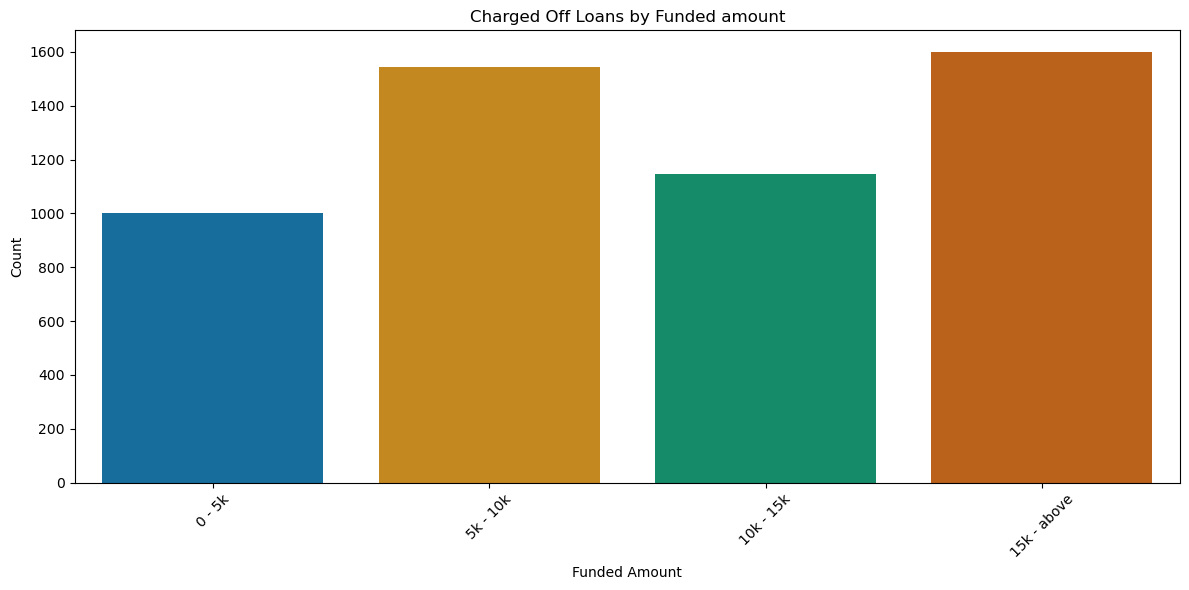

In [71]:
plt.figure(figsize=(12, 6))
sns.countplot(x='funded_amnt_bucket', data=data[data['loan_status'] == 'Charged Off'])
plt.title("Charged Off Loans by Funded amount")  # Add a title
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.xlabel("Funded Amount")  # x-axis label
plt.ylabel("Count")  # y-axis label
plt.tight_layout()  # Ensure everything fits nicely in the figure
plt.show()

In [72]:
# Bucketting DTI
dti_thresholds = [8, 12, 16, 20]
dti_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
data['dti_bucket'] = data['dti'].apply(bucket_data, args=(dti_thresholds, dti_labels))

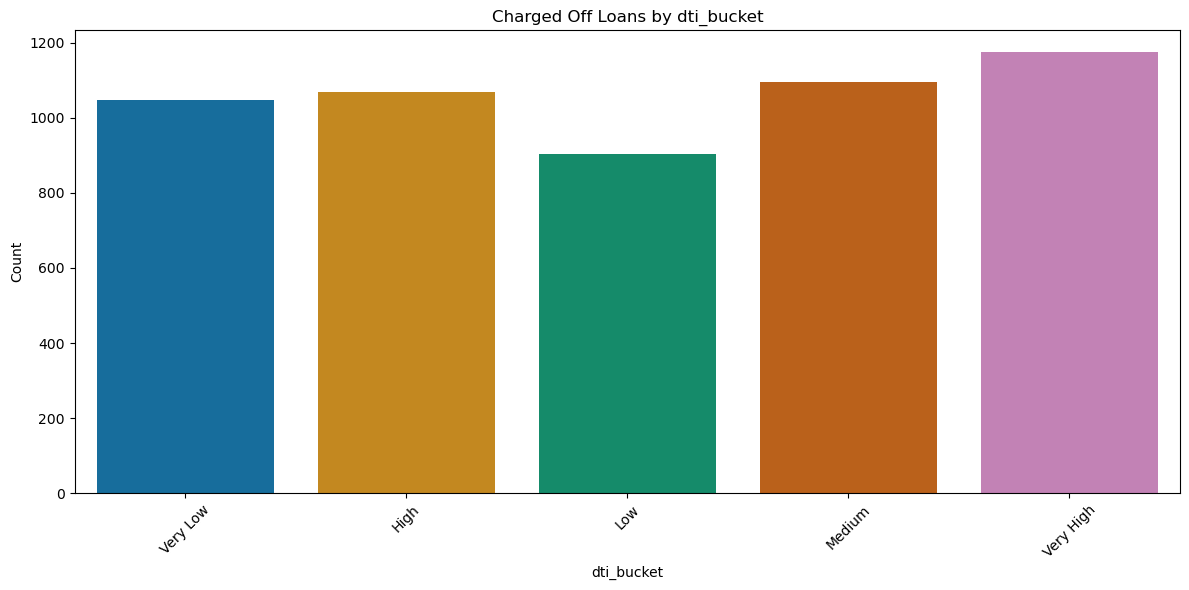

In [73]:
plt.figure(figsize=(12, 6))
sns.countplot(x='dti_bucket', data=data[data['loan_status'] == 'Charged Off'])
plt.title("Charged Off Loans by dti_bucket")  # Add a title
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.xlabel("dti_bucket")  # x-axis label
plt.ylabel("Count")  # y-axis label
plt.tight_layout()  # Ensure everything fits nicely in the figure
plt.show()

<Axes: xlabel='verification_status', ylabel='count'>

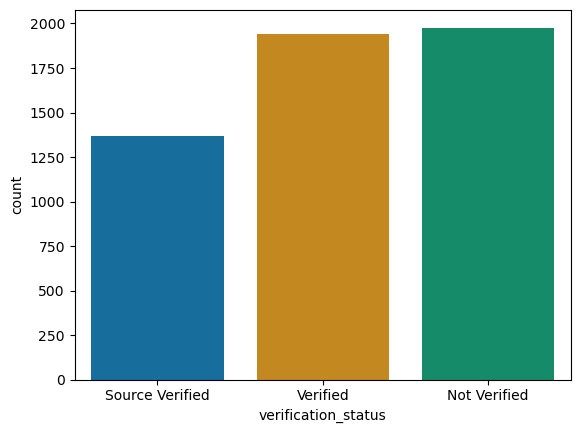

In [69]:
sns.countplot(x='verification_status', data=data[data['loan_status']=='Charged Off'])

3. Data Analysis
Derived Columns
Univariate Analysis (including Segmented Univariate Analysis)
Bivariate Analysis
3.1. Derived Columns
Derived metrics for Month (issue_m), Year (issue_y) and Quarter (issue_q) from column "issue_d"
Create new column loan_paid with 'Yes' and 'No' values based on loan_status column where 'Yes' = "Fully Paid" and 'No' = "Charged off"
Creating different buckets for loan amount (loan_amount_bucket), interest rate (interest_rate_bucket), annual income (annual_income_bucket)
3.1.1. Derived metrics for Month (issue_m), Year (issue_y) and Quarter (issue_q) from column "issue_d"

###  3.2.1.2. Unordered Categorical Variables

<Axes: xlabel='addr_state', ylabel='count'>

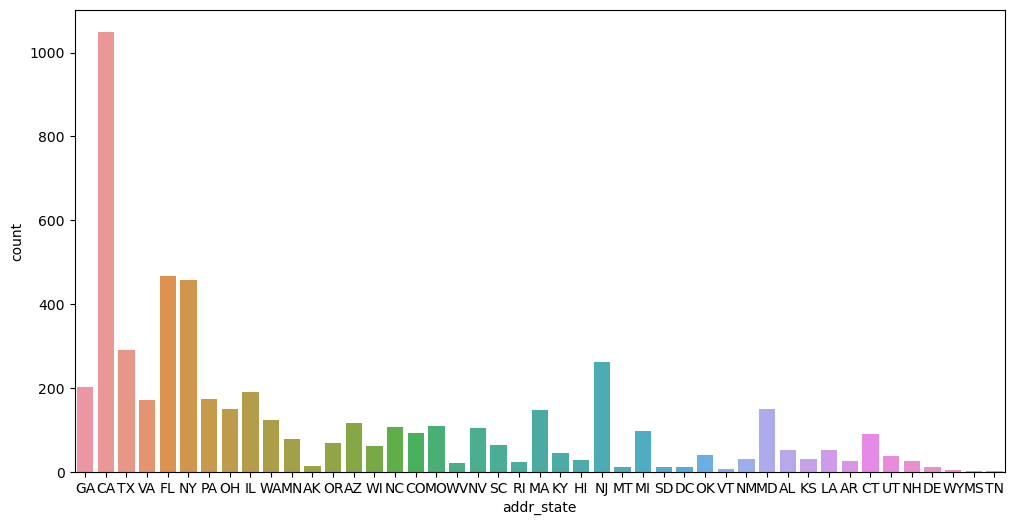

In [129]:
plt.figure(figsize=(12, 6))
sns.countplot(x='addr_state', data=data[data['loan_status'] == 'Charged Off'])

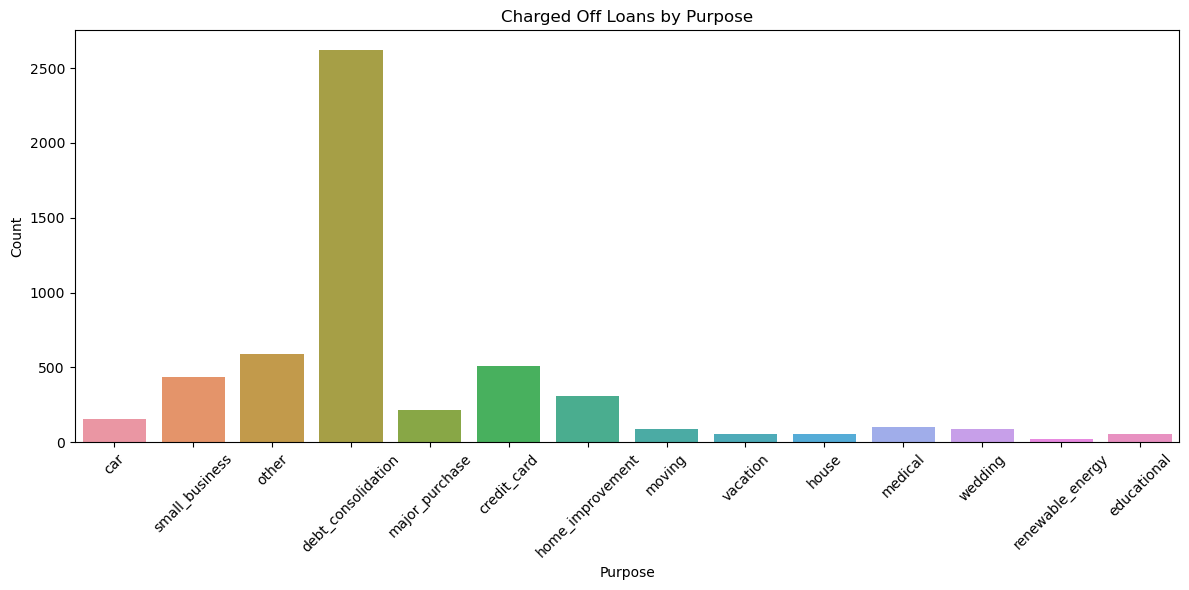

In [131]:
plt.figure(figsize=(12, 6))
sns.countplot(x='purpose', data=data[data['loan_status'] == 'Charged Off'])
plt.title("Charged Off Loans by Purpose")  # Add a title
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.xlabel("Purpose")  # x-axis label
plt.ylabel("Count")  # y-axis label
plt.tight_layout()  # Ensure everything fits nicely in the figure
plt.show()

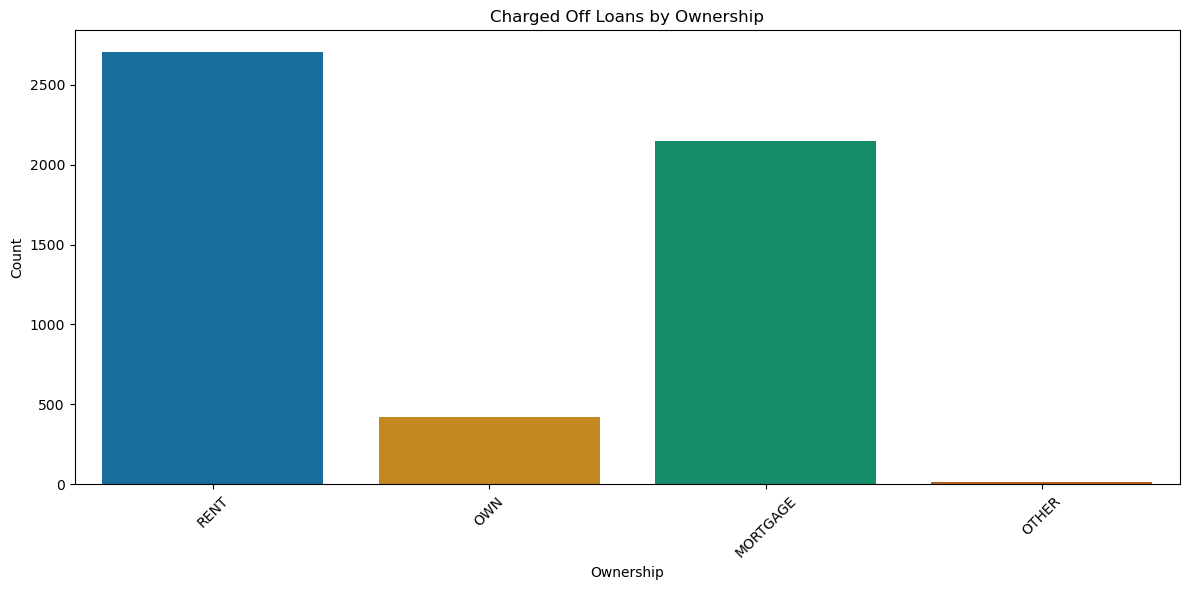

In [132]:
plt.figure(figsize=(12, 6))
sns.countplot(x='home_ownership', data=data[data['loan_status'] == 'Charged Off'])
plt.title("Charged Off Loans by Ownership")  # Add a title
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.xlabel("Ownership")  # x-axis label
plt.ylabel("Count")  # y-axis label
plt.tight_layout()  # Ensure everything fits nicely in the figure
plt.show()

In [141]:
installments_df = data[data.loan_paid == 'No']

C:\Users\4270\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


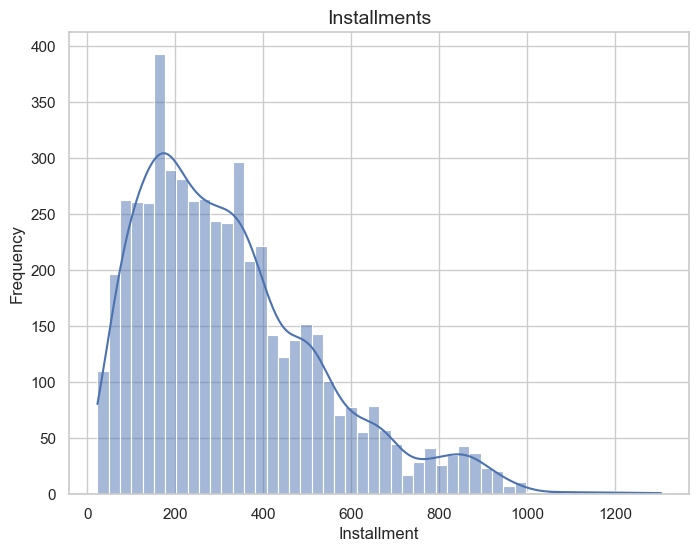

In [145]:
plot_histogram(installments_df, column='installment', bins=50, title='Installments', xlabel='Installment', ylabel='Frequency')

# Observations and Inferences from Univariate Analysis

## Ordered Categorical Variables

- **Grade B** had the highest number of *"Charged off"* loan applicants, with a total of **1,352 applicants**, indicating challenges in loan repayment for this credit grade.  
- Short-term loans with a **duration of 36 months** were the most popular among *"Charged off"* applicants, with **3,006 applications**, suggesting that shorter repayment terms may correlate with loan defaults.  
- Applicants employed for **more than 10 years** accounted for the highest number of *"Charged off"* loans, totaling **1,474**, indicating long-term employment doesn't necessarily ensure successful loan repayment.  
- The year **2011** recorded the highest number of *"Charged off"* loan applications (**3,152**), potentially reflecting economic challenges during that period.  
- *"Charged off"* loans were most commonly taken during the **4th quarter**, with **2,284 applications**, peaking in **December**, potentially due to financial pressures during the holiday season.  

## Unordered Categorical Variables

- **California** had the highest number of *"Charged off"* loan applicants (**1,055**), suggesting a need for stricter eligibility criteria or credit assessments in this state.  
- **Debt consolidation** was the primary loan purpose for most *"Charged off"* applicants (**2,633**), requiring cautious approval for such loans.  
- The majority of *"Charged off"* applicants (**2,715**) lived in **rented houses**, highlighting the need for financial stability assessments for such individuals.  
- A significant number of loan participants (**5,317**) were **loan defaulters**, indicating a need for improved risk assessment, stricter credit checks, and borrower financial education.  

## Quantitative Variables

- **1,561 loan applicants** who *charged off* had annual salaries less than **$40,000 USD**.  
  - The lending company should exercise caution when lending to individuals with low annual salaries.  
  - Rigorous income verification and thorough assessment of repayment capacity should be implemented for these applicants.  

- Among loan participants who *charged off* (**2,025**), a considerable portion belonged to the **13%-17% interest rate bucket**.  
  - To reduce the risk of default, the lending company should consider offering loans at lower interest rates when feasible.  

- **1,695 loan participants** who *charged off* received loan amounts of **$15,000 USD and above**.  
  - The lending company should carefully evaluate applicants seeking higher loan amounts.  
  - Applicants must demonstrate a strong credit history and repayment capability to manage larger loans.  

- **1,608 loan participants** who *charged off* received funded amounts of **$15,000 USD and above**.  
  - The lending company should ensure that funded amounts align with the borrower's financial capacity.  
  - Thorough credit assessments should be conducted for larger loan requests.  

- Among loan participants who *charged off*, **1,178 loan applicants** had **very high debt-to-income ratios**.  
  - Strict debt-to-income ratio requirements should be implemented to prevent lending to individuals with unsustainable debt levels.  

- It was observed that the majority of *charged off* applicants had **monthly installment amounts between $160-$440 USD**.  
  - The lending company should closely monitor and assess applicants with similar installment amounts to mitigate the risk of loan defaults.  



### 3.3. Bivariate Analysis

Following fields will be analysed as part of bivariate analysis against Loan Status (`loan_status`) column

#### 1. Categorical variables
    1. Ordered categorical data
        1. Grade (grade)
        2. Sub grade (sub_grade)
        3. Term (36 / 60 months) (term)
        4. Employment length (emp_length)
        5. Issue year (issue_y)
        6. Issue month (issue_m)
        7. Issue quarter (issue_q)

    2. Unordered categorical data
        1. Loan purpose (purpose)
        2. Home Ownership (home_ownership)
        3. Verification Status (verification_status)
        4. Address State (addr_state)
        
#### 2. Quantitative variables
    1. Int Rate Bucket (int_rate_bucket)
    2. Debt to Income Bucket (dti_bucket)
    3. Annual Income Bucket (annual_inc_bucket)
    4. Funded Amount Bucket (funded_amnt_bucket)
    5. Loan Amount Bucket (loan_amnt_bucket)

### 3.3.1. Bivariate Analysis of Ordered Categorical Variables

#### 3.3.1.1.1. Grade vs. Loan Status

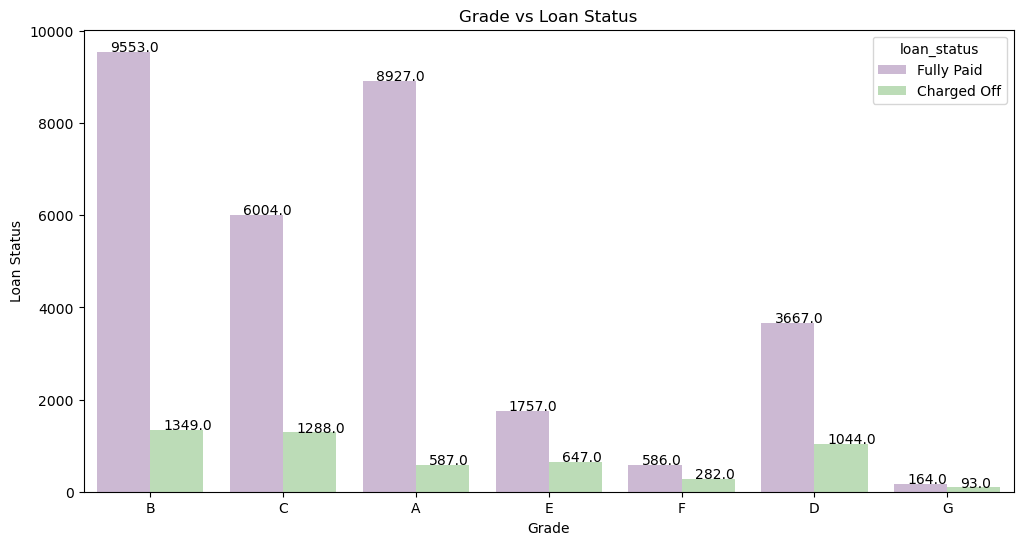

In [77]:
countplot_graph({
    'data': data,
    'x': 'grade',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Grade',
    'ylabel': 'Loan Status',
    'title': 'Grade vs Loan Status',
    'palette': 'PRGn'
})

###### The loan applicants belonging to Grades B, C and D contribute to most number of "Charged Off" loans

#### 3.3.1.1.2. Sub Grade vs. Loan Status

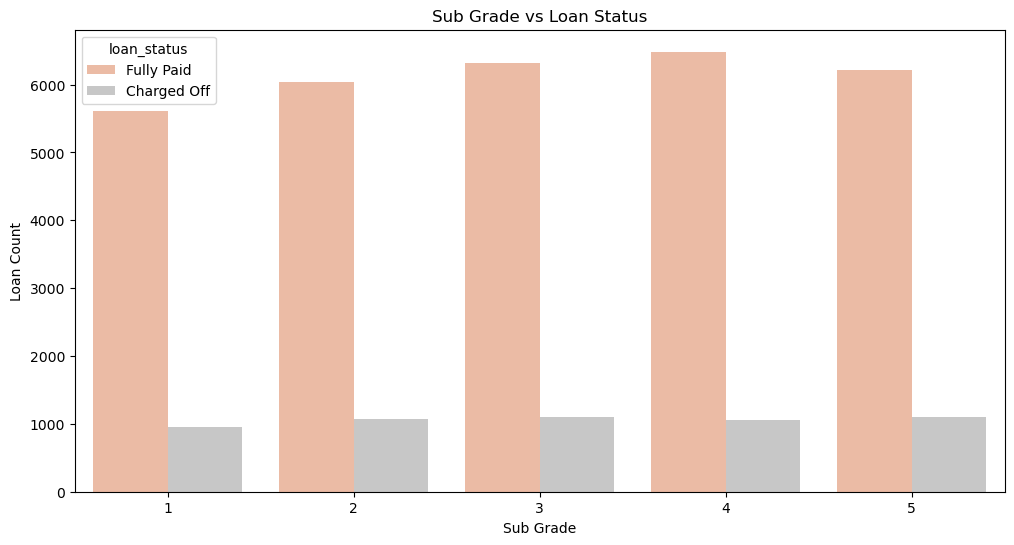

In [78]:
#3.3.1.1.2. Sub Grade vs. Loan Status
countplot_graph({
    'data': data,
    'x': 'sub_grade',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Sub Grade',
    'ylabel': 'Loan Count',
    'title': 'Sub Grade vs Loan Status',
    'palette': 'RdGy'
}, annot = False)

#### 3.3.1.1.3. Term vs. Loan Status

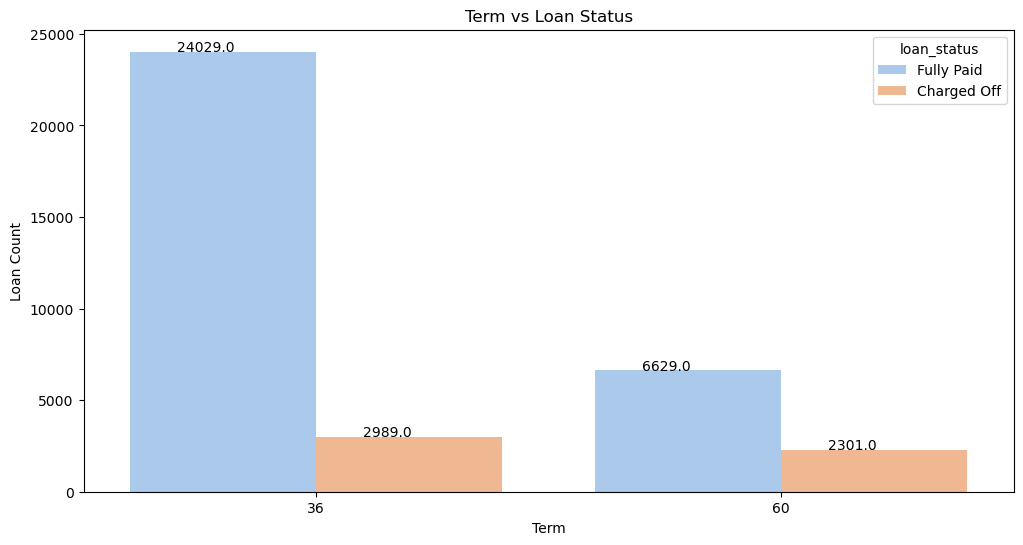

In [79]:
#3.3.1.1.3. Term vs. Loan Status
countplot_graph({
    'data': data,
    'x': 'term',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Term',
    'ylabel': 'Loan Count',
    'title': 'Term vs Loan Status',
    'palette': 'pastel'
})

charged_off_percent_36_m = charged_off_percent(loan_df, 'term', 36)
charged_off_percent_60_m = charged_off_percent(loan_df, 'term', 60)
print(f'Charged off pecentage for people taking loan for 60 months - {charged_off_percent_60_m}%')
print(f'Charged off pecentage for people taking loan for 36 months - {charged_off_percent_36_m}%')

##### Loan applicants applying loan for 60 months are likely to default more than the one taking loan for 36 months

#### 3.3.1.1.4. Employment Length vs. Loan Status

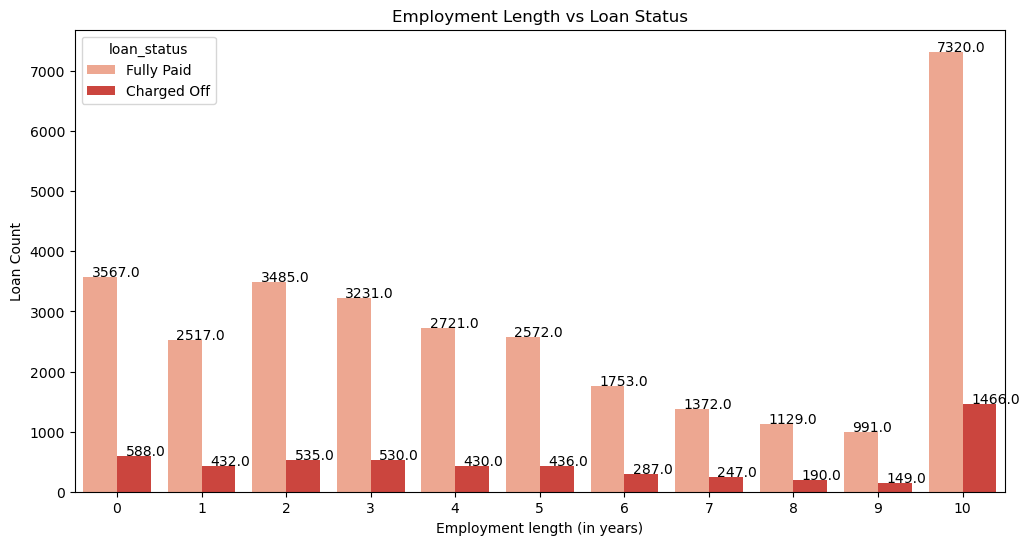

In [80]:
#3.3.1.1.4. Employment Length vs. Loan Status
countplot_graph({
    'data': data,
    'x': 'emp_length',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Employment length (in years)',
    'ylabel': 'Loan Count',
    'title': 'Employment Length vs Loan Status',
    'palette': "Reds"
})

###### Most number of loan applicants are 10 or more years of experience. They also are the ones who are most likely to default

#### 3.3.1.1.5. Loan Year vs. Loan Status

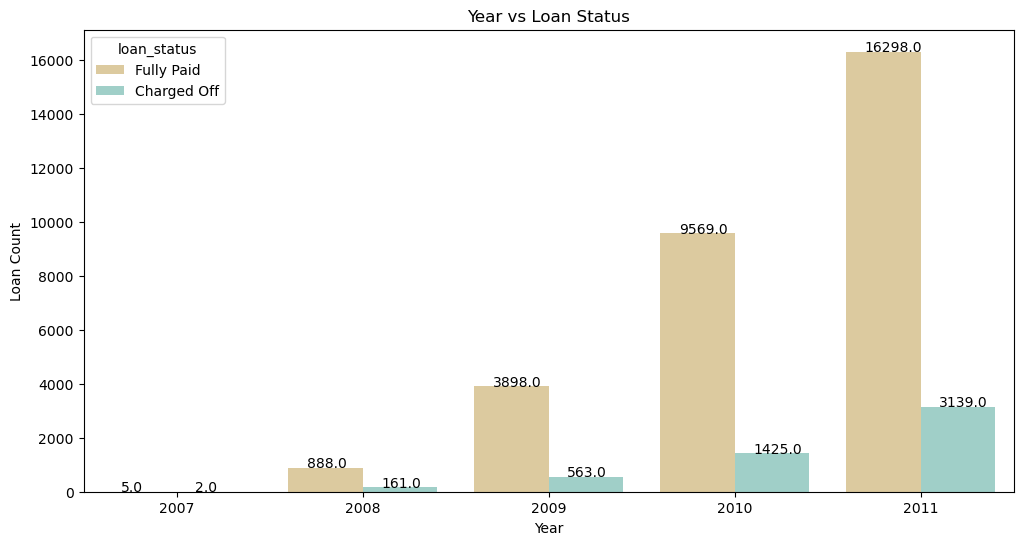

In [81]:
#3.3.1.1.5. Loan Year vs. Loan Status
countplot_graph({
    'data': data,
    'x': 'issue_y',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Year',
    'ylabel': 'Loan Count',
    'title': 'Year vs Loan Status',
    'palette': "BrBG"
})

###### The loan applicants have increased steadily from 2007 to 2011 showcasing positive trend in the upcoming years.

#### 3.3.1.1.6. Loan Month vs. Loan Status

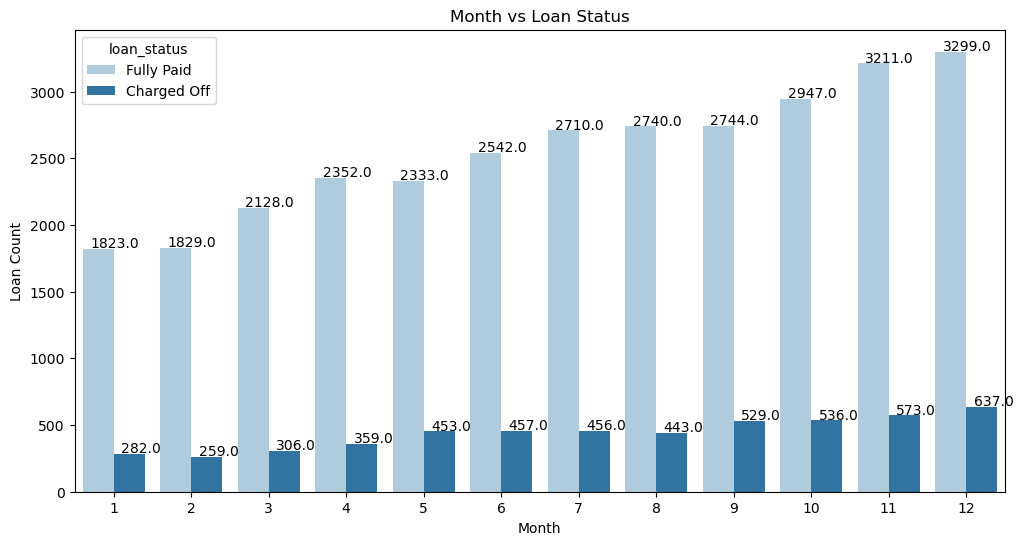

In [82]:
countplot_graph({
    'data': data,
    'x': 'issue_m',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Month',
    'ylabel': 'Loan Count',
    'title': 'Month vs Loan Status',
    'palette': "Paired"
})

###### The month of December is the most preferred month of taking loans. This may be due to the holiday season.

#### 3.3.1.1.7. Loan Quarter vs. Loan Status

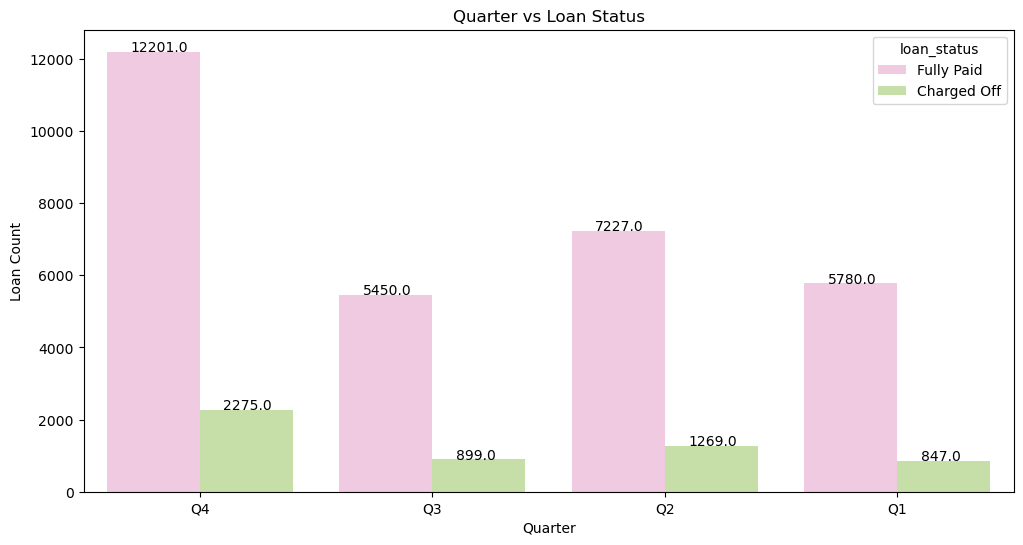

In [83]:
countplot_graph({
    'data': data,
    'x': 'issue_q',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Quarter',
    'ylabel': 'Loan Count',
    'title': 'Quarter vs Loan Status',
    'palette': "PiYG"
})

###### Q4 is the most preferred quarter for taking loans. This is mainly due to the holiday season coming up.

### 3.3.2. Bivariate Analysis of Unordered Categorical Variables

#### 3.3.1.2.1 Purpose vs. Loan Status

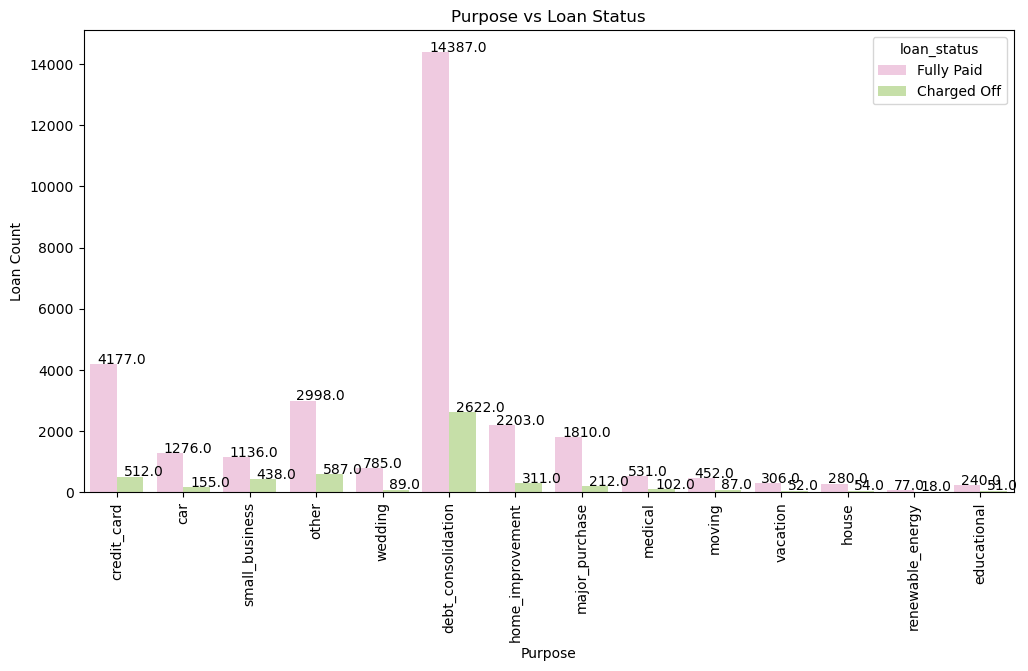

In [84]:
#3.3.1.2.1 Purpose vs. Loan Status
countplot_graph({
    'data': data,
    'x': 'purpose',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Purpose',
    'ylabel': 'Loan Count',
    'title': 'Purpose vs Loan Status',
    'palette': "PiYG",
    'x_tick_rotation': 90
})

###### Debt consolidation is the category where maximum loans are issued and people have defaulted the most in the same category.

#### 3.3.1.2.2. Home Ownership vs. Loan Status

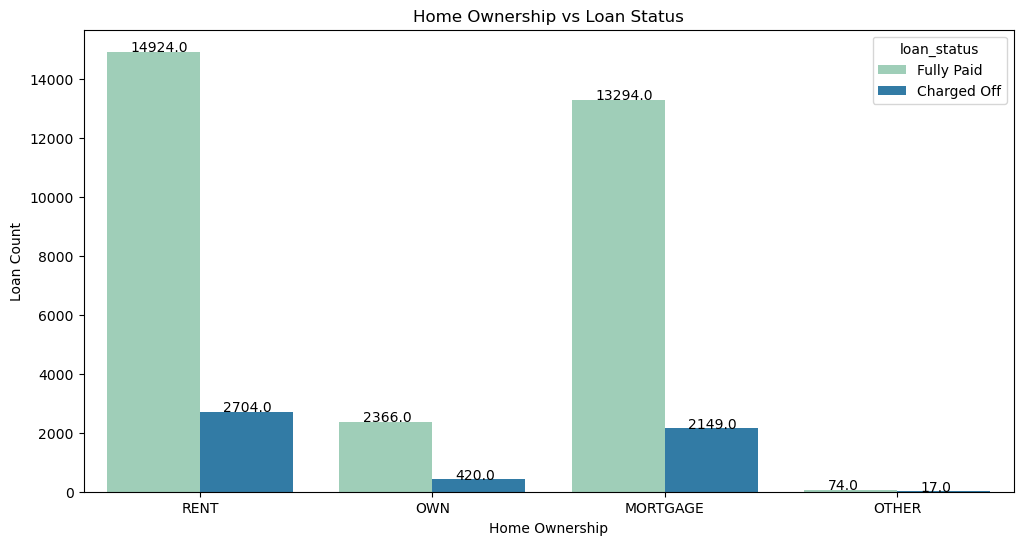

In [85]:
#3.3.1.2.2. Home Ownership vs. Loan Status
countplot_graph({
    'data': data,
    'x': 'home_ownership',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Home Ownership',
    'ylabel': 'Loan Count',
    'title': 'Home Ownership vs Loan Status',
    'palette': "YlGnBu"
})

###### The loan applicants who live in a rented or mortgaged house are more likely to default

#### 3.3.1.2.3. Verification Status vs. Loan Status

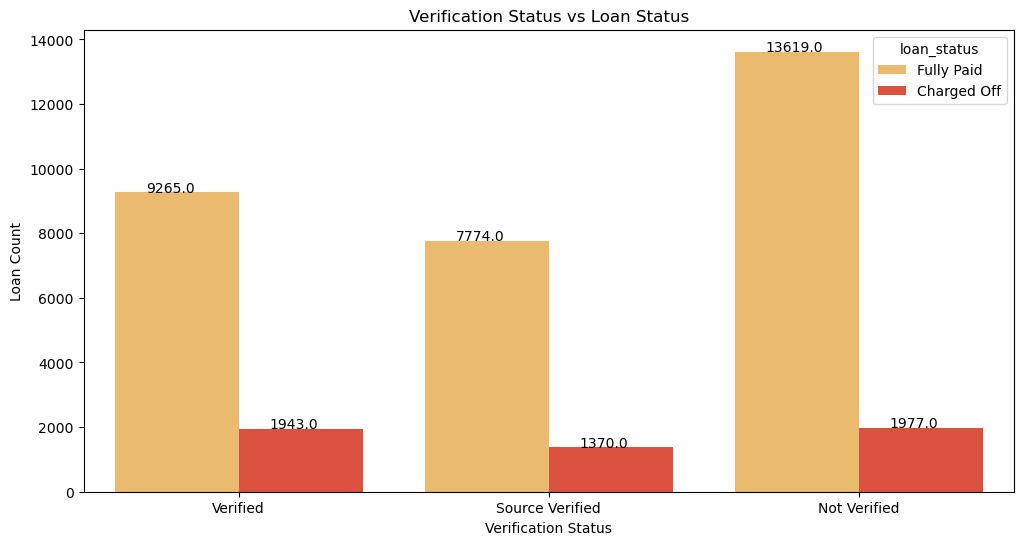

In [86]:
countplot_graph({
    'data': data,
    'x': 'verification_status',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Verification Status',
    'ylabel': 'Loan Count',
    'title': 'Verification Status vs Loan Status',
    'palette': "YlOrRd"
})

###### The loan applicants who have been verified are defaulting more than the applicants who are not verified

#### 3.3.1.2.4. Address State vs. Loan Status

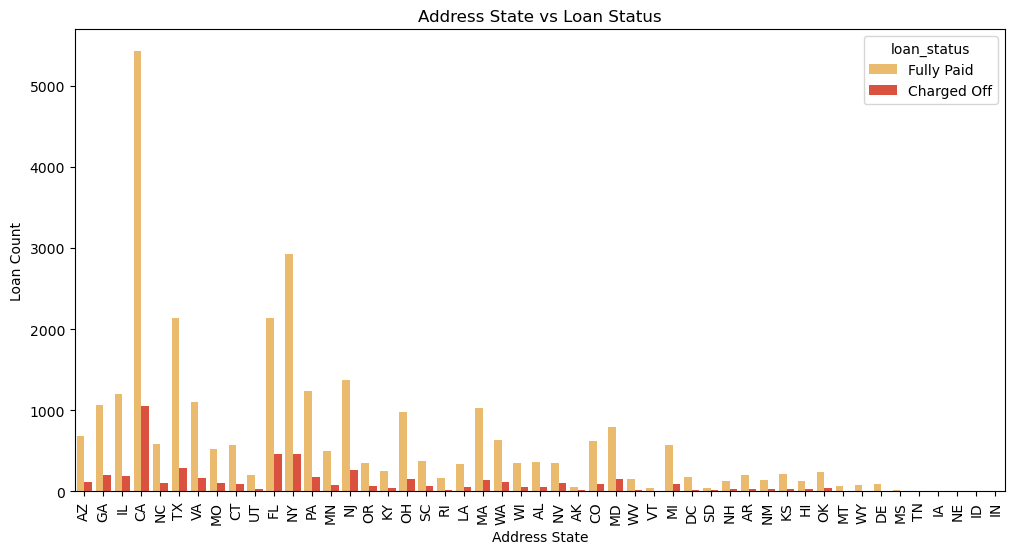

In [87]:
countplot_graph({
    'data': data,
    'x': 'addr_state',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Address State',
    'ylabel': 'Loan Count',
    'title': 'Address State vs Loan Status',
    'palette': "YlOrRd",
    'x_tick_rotation': 90
}, annot=False)

###### Loan applicants from the state of California (CA), Florida (FL), and New York (NY) are most likely to default

### 3.3.2. Bivariate Analysis of Quantitative Variables

C:\Users\4270\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\4270\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


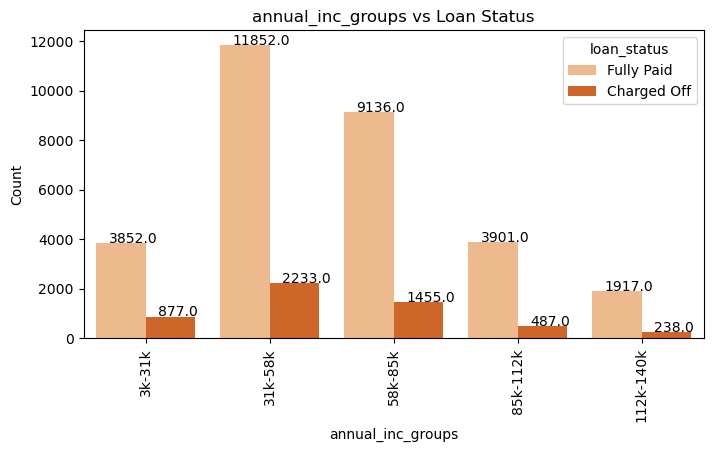

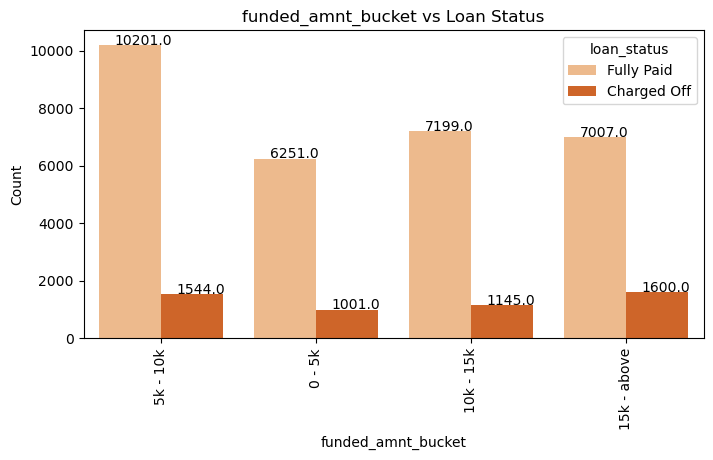

C:\Users\4270\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\4270\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


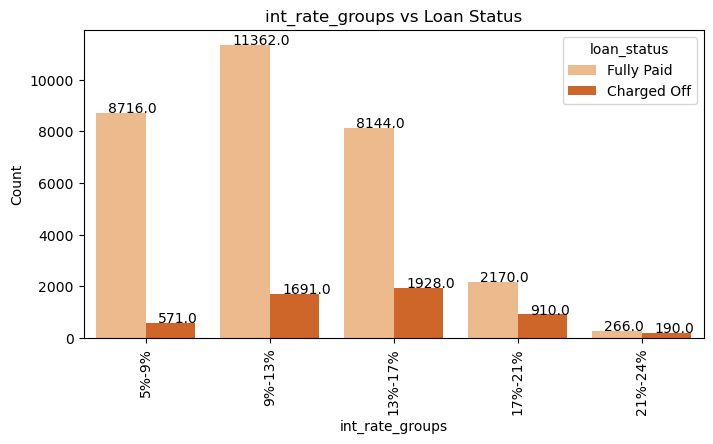

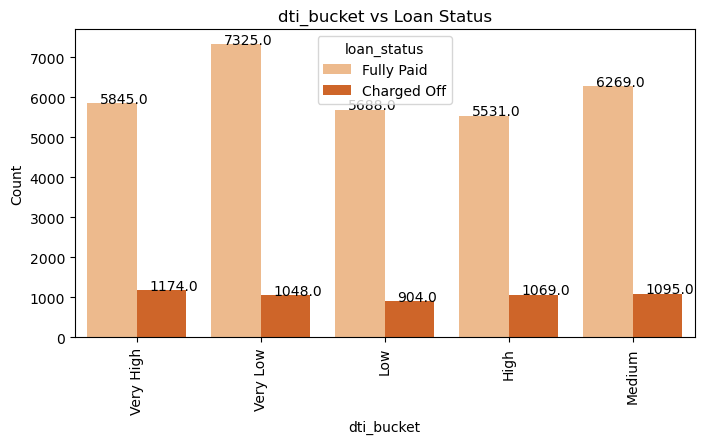

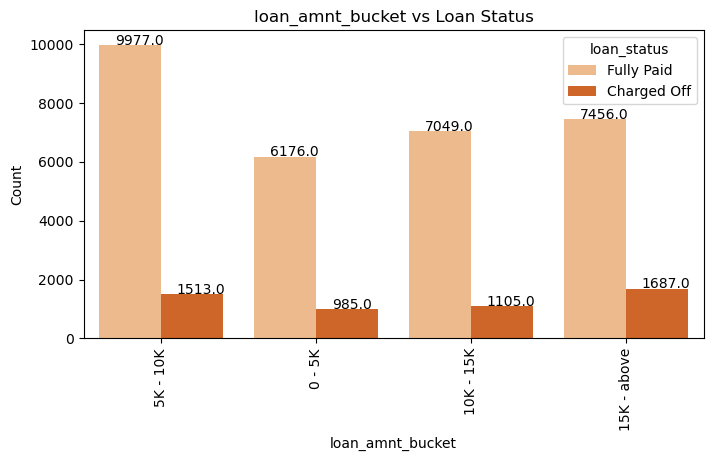

In [89]:
for col in ['annual_inc_groups', 'funded_amnt_bucket', 'int_rate_groups', 'dti_bucket', 'loan_amnt_bucket']:
    countplot_graph({
    'data': data,
    'x': col,
    'figsize': (8, 4),
    'hue': 'loan_status',
    'xlabel': col,
    'ylabel': 'Count',
    'title': f'{col} vs Loan Status',
    'palette': "Oranges",
    'x_tick_rotation': 90
}, annot=True)

#### Observations from Bivariate Analysis of Quantitative Variables

- A majority of the loan applicants who defaulted received loan amounts of $15,000 or higher.

- The majority of loan applicants who charged off had significantly high Debt-to-Income (DTI) ratios.

- A significant portion of loan applicantsawho defaulted received loans with interest rates falling within the range of 13% to 17%.

- A majority of the loan applicants who charged off reported an annual income of less than $40,000.

### Summary of Bivariate Analysis

1. Loan applicants belonging to **Grades B, C, and D** contribute to the majority of "Charged Off" loans.

2. Applicants in **Sub Grades B3, B4, and B5** are more likely to default.

3. Applicants opting for loans with a **60-month term** are more prone to default than those with **36-month terms**.

4. Most loan applicants have **10 or more years of experience**, and they are also the most likely to default.

5. The number of loan applicants has steadily increased from **2007 to 2011**, indicating a positive trend in the upcoming years.

6. **December** is the most preferred month for taking loans, possibly due to the holiday season.

7. The **fourth quarter (Q4)** is the most preferred quarter for taking loans, driven primarily by the holiday season.

8. **Debt consolidation** is the category with the maximum number of loans issued, and it also has the highest number of defaults.

9. Loan applicants living in **rented or mortgaged houses** are more likely to default.

10. **Verified loan applicants** are defaulting at a higher rate than those who are not verified.

11. Loan applicants from the states of **California (CA), Florida (FL), and New York (NY)** are most likely to default.

12. A majority of loan applicants who defaulted received **loan amounts of $15,000 or higher**.

13. Most applicants who charged off had significantly **high Debt-to-Income (DTI) ratios**.

14. A significant portion of defaulting applicants received loans with **interest rates between 13% and 17%**.

15. A majority of loan applicants who charged off reported an **annual income of less than $40,000**.


### Risk Assessment Recommendations

1. **Grades B, C, and D**  
   - Loan applicants from Grades B, C, and D contribute to most "Charged Off" loans.  
   - **Recommendation:** Implement stricter risk assessment and underwriting criteria for applicants in these grades.

2. **Subgrades B3, B4, and B5**  
   - Applicants with Subgrades B3, B4, and B5 are more likely to default.  
   - **Recommendation:** Apply additional risk mitigation measures, such as offering lower loan amounts or tighter approval conditions.

3. **Term Length**  
   - Applicants opting for **60-month loans** show a higher likelihood of default.  
   - **Recommendation:** Evaluate risks associated with longer-term loans and consider limiting maximum terms or adjusting interest rates accordingly.

4. **Experience and Default Probability**  
   - Applicants with **10+ years of experience** are more prone to default, indicating that experience alone isn't a reliable creditworthiness indicator.  
   - **Recommendation:** Use a more comprehensive credit scoring system that includes additional risk factors.

5. **Positive Growth Trend**  
   - Loan applications have increased steadily from **2007 to 2011**, signaling market growth.  
   - **Recommendation:** Capitalize on this trend while ensuring robust risk management practices.

6. **Seasonal Trends**  
   - **December** and **Q4** are peak periods for loan applications, likely due to the holiday season.  
   - **Recommendation:** Anticipate increased demand during these times and optimize processing to meet customer needs efficiently.

7. **Debt Consolidation Risk**  
   - Debt consolidation loans show the highest default rates.  
   - **Recommendation:** Carefully evaluate these applicants, adjust interest rates, or offer financial counseling to reduce risks.

8. **Housing Status and Default Risk**  
   - Applicants living in **rented or mortgaged houses** are more likely to default.  
   - **Recommendation:** Factor housing stability into the underwriting process to better assess repayment ability.

9. **Verification Process**  
   - **Verified loan applicants** default more than unverified ones.  
   - **Recommendation:** Review and enhance the verification process to ensure effective assessment of creditworthiness.

10. **Geographic Risk**  
    - Applicants from **California (CA)**, **Florida (FL)**, and **New York (NY)** have higher default rates.  
    - **Recommendation:** Monitor regional risk trends and adjust lending strategies or interest rates for these areas.

11. **High Loan Amounts**  
    - Defaults are more common among applicants receiving **loan amounts of $15,000 or higher**.  
    - **Recommendation:** Conduct thorough assessments for larger loan requests and consider capping amounts for higher-risk applicants.

12. **DTI and Interest Rates**  
    - High **Debt-to-Income (DTI) ratios** and **interest rates between 13%-17%** are linked to defaults.  
    - **Recommendation:** Adjust interest rates based on DTI ratios and ensure repayment terms are manageable.

13. **Low Annual Income**  
    - Applicants with **annual incomes below $40,000** are more likely to default.  
    - **Recommendation:** Offer financial education resources and set maximum loan amounts based on income levels to enhance affordability.


## 4. Multivariate Analysis


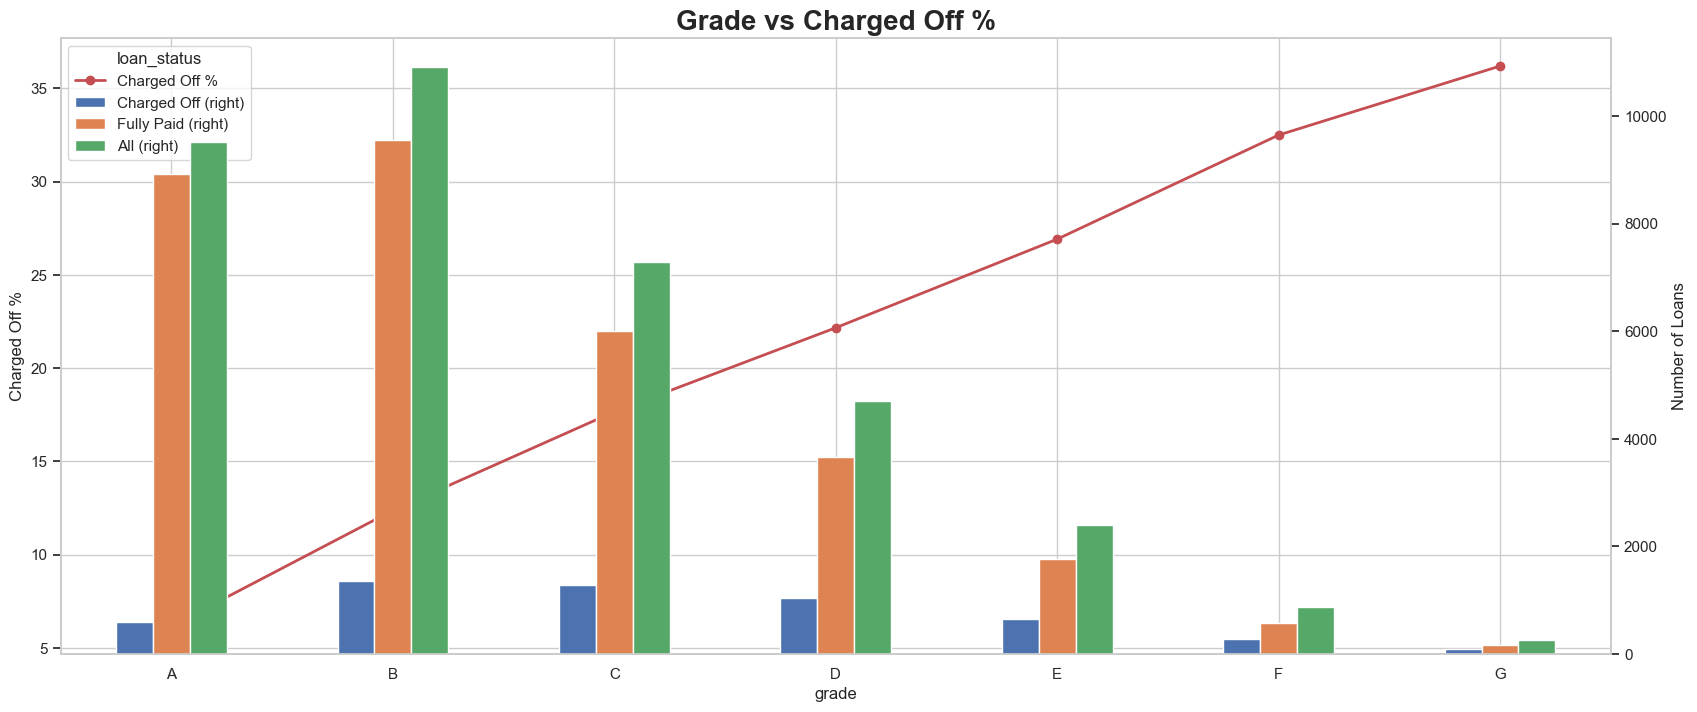

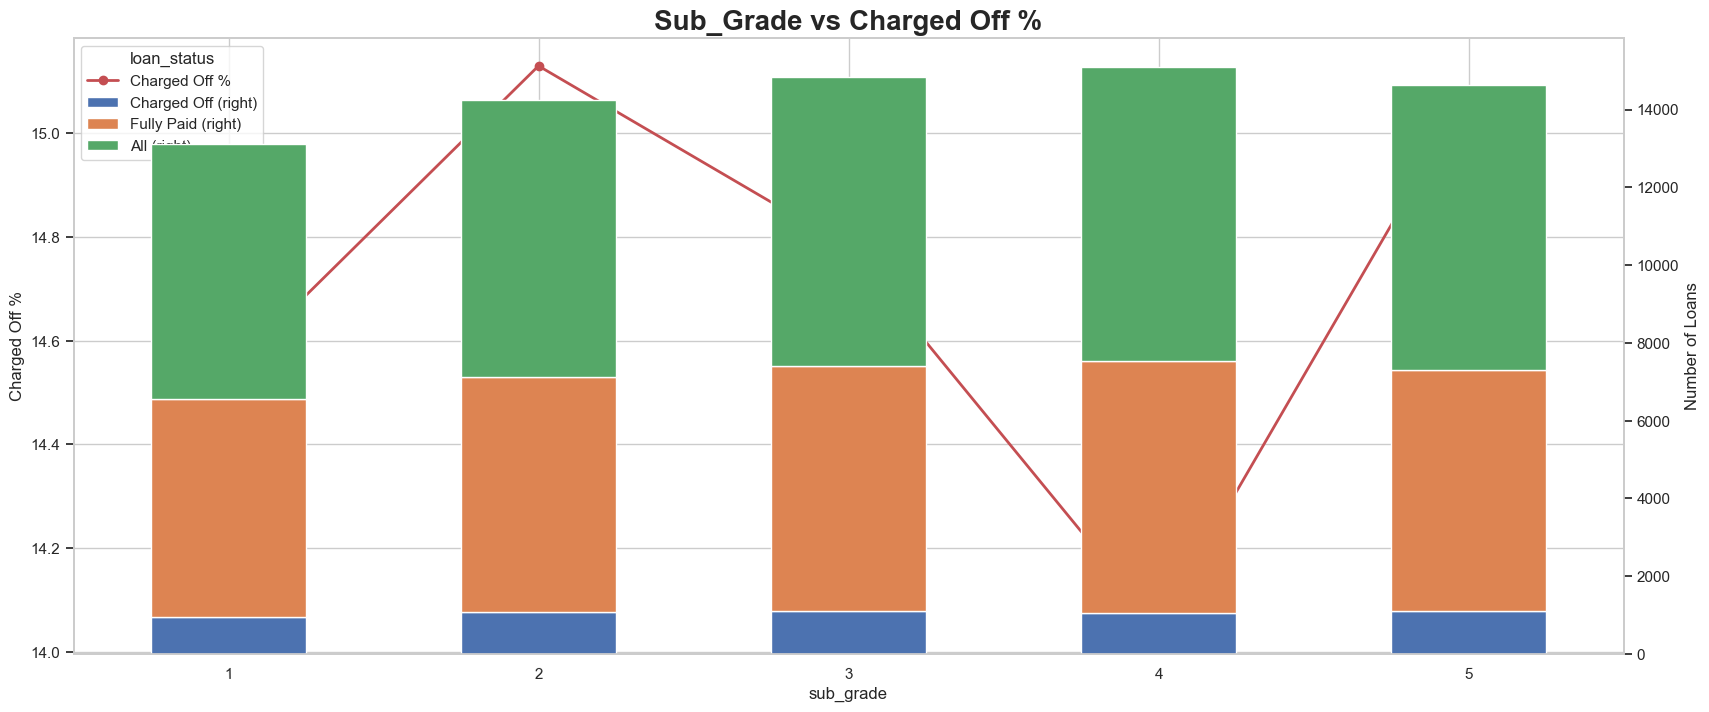

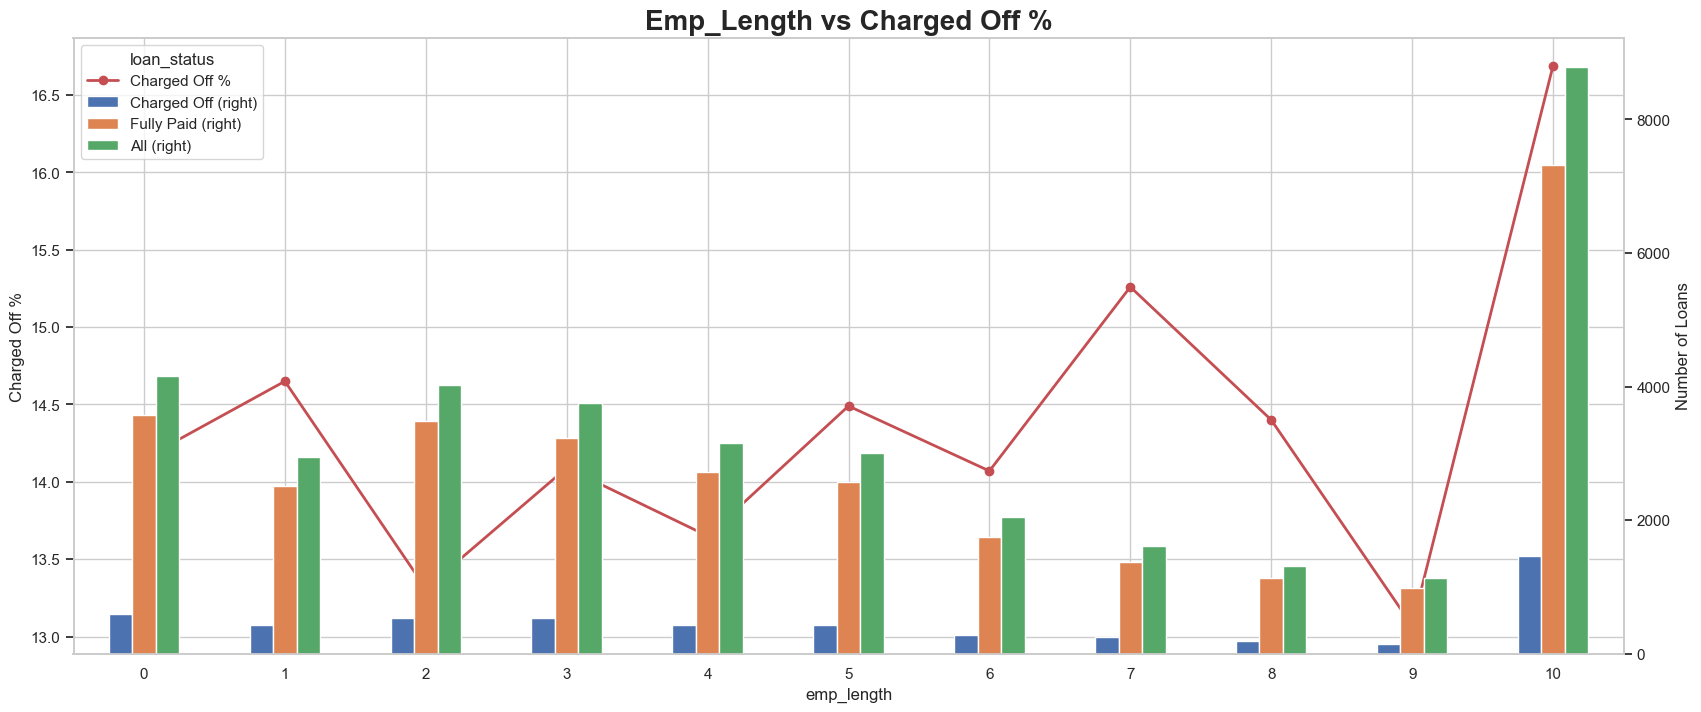

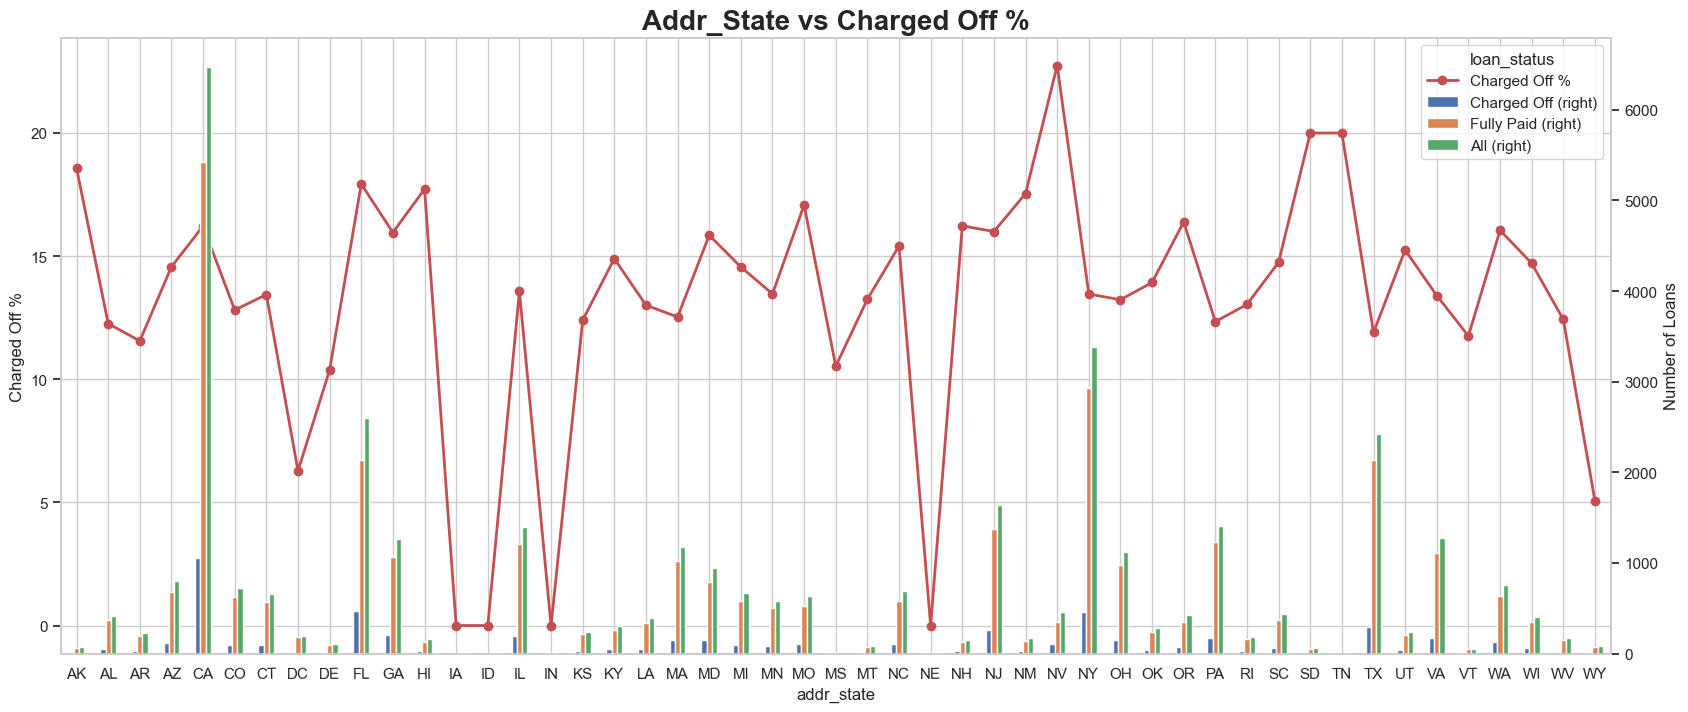

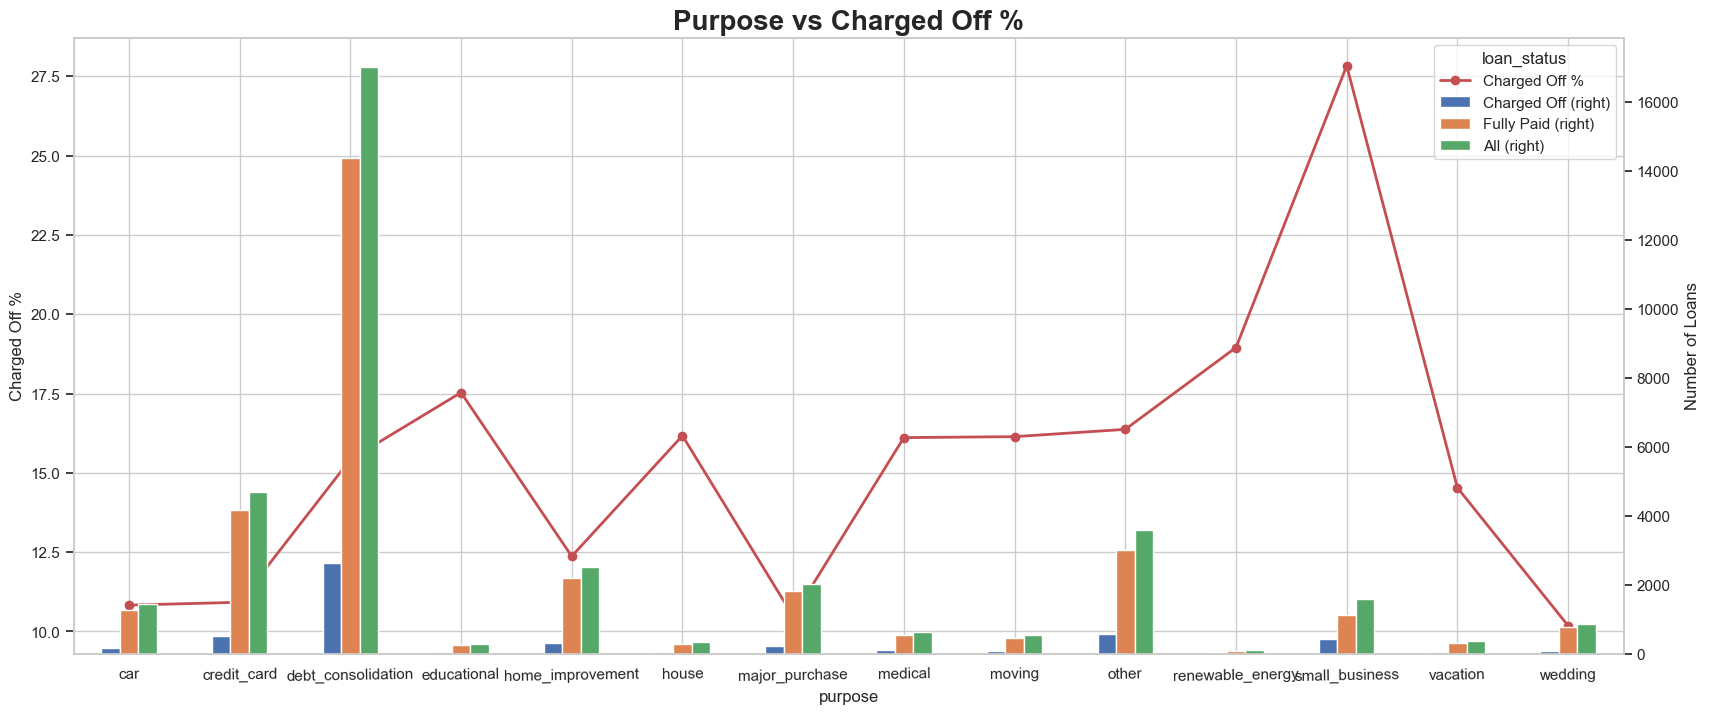

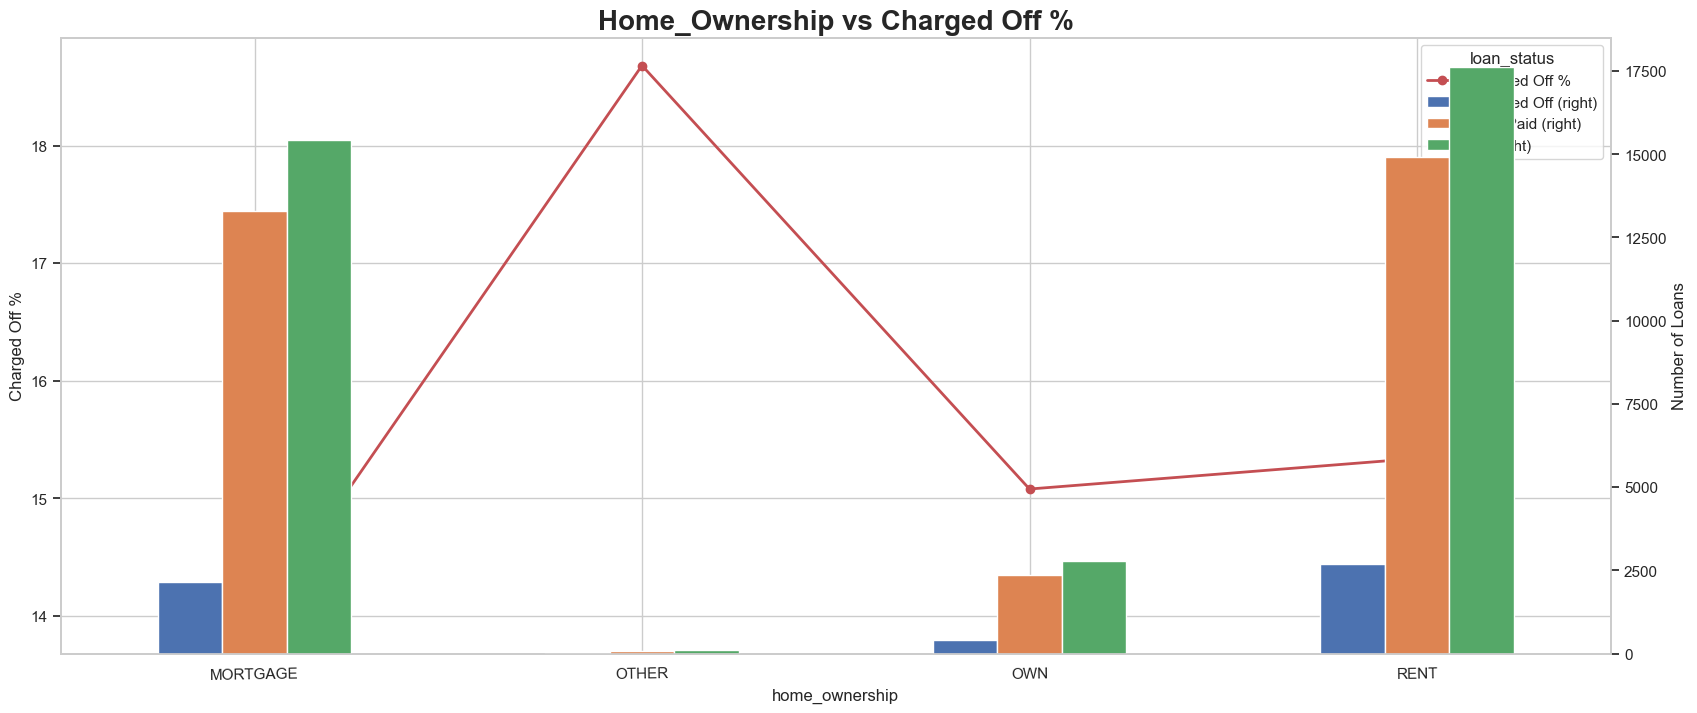

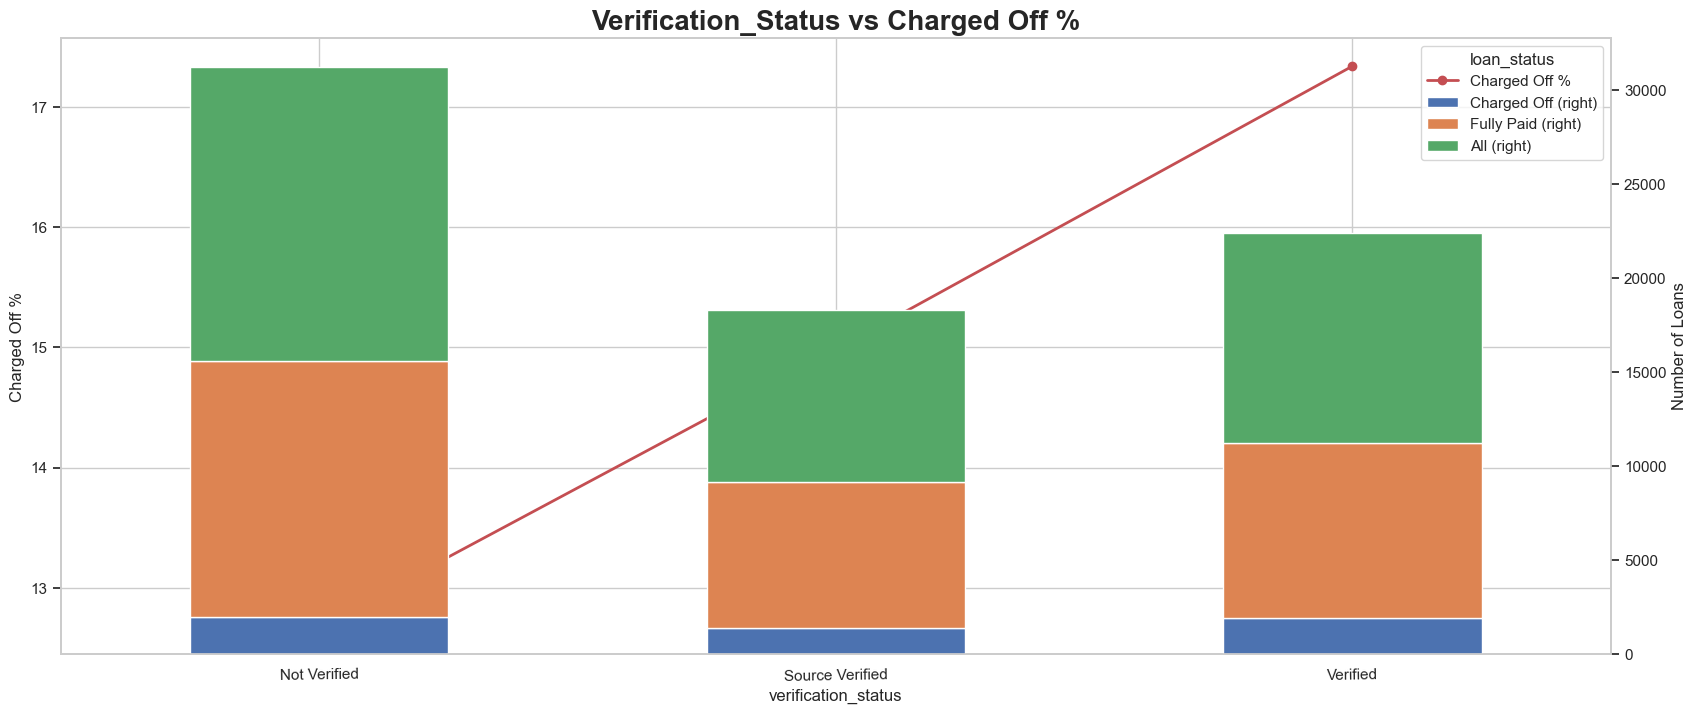

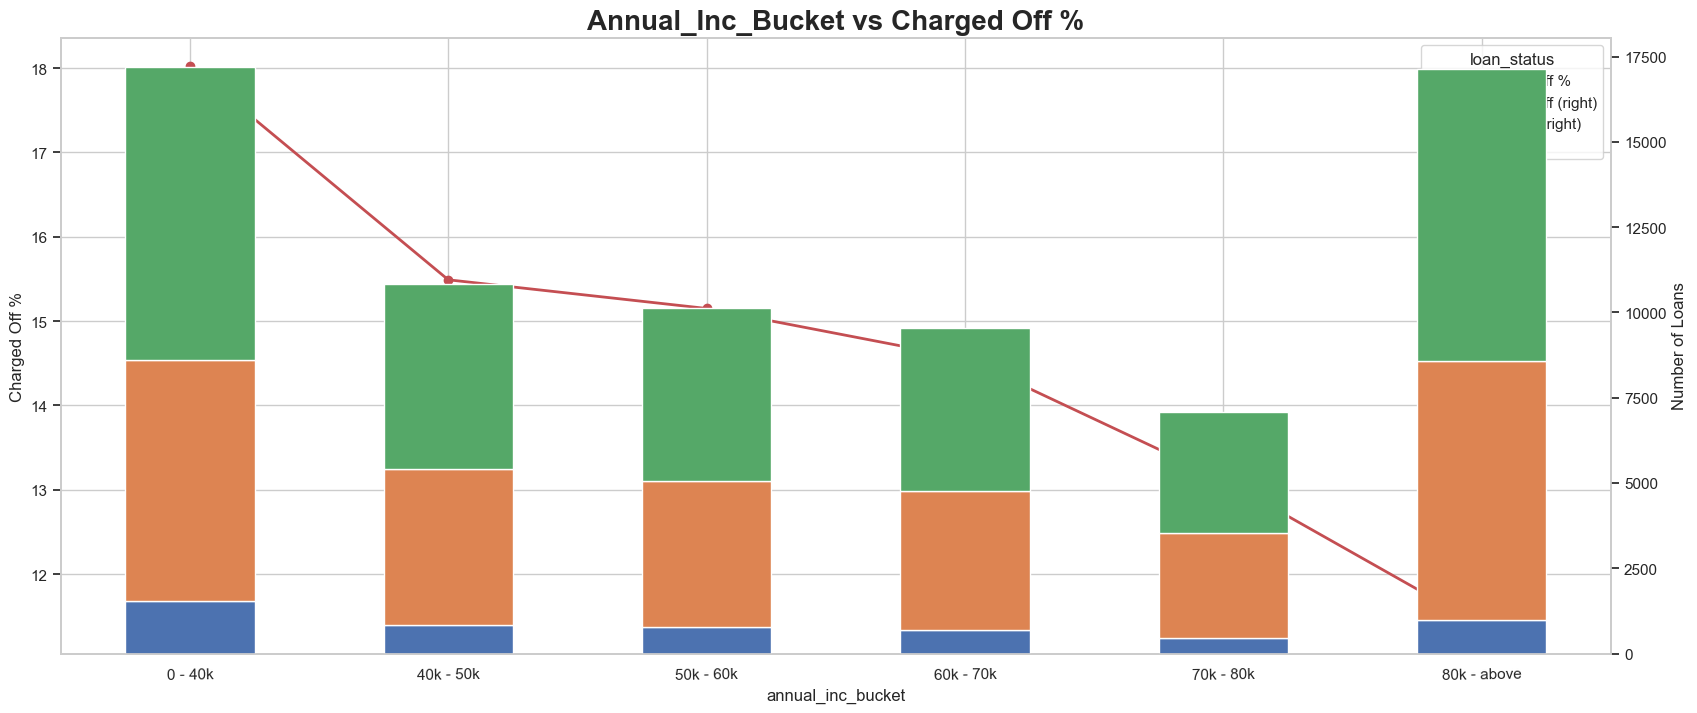

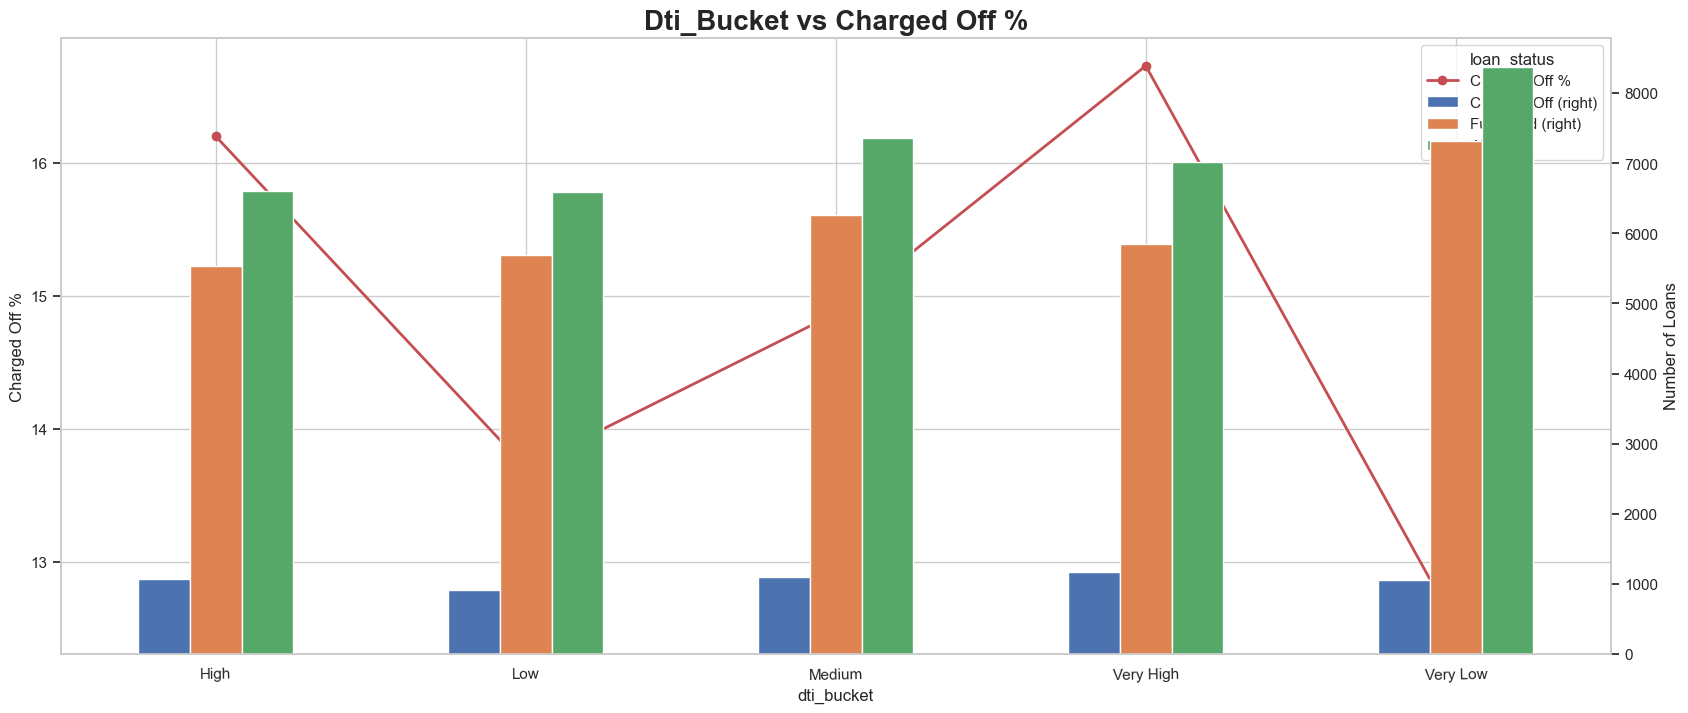

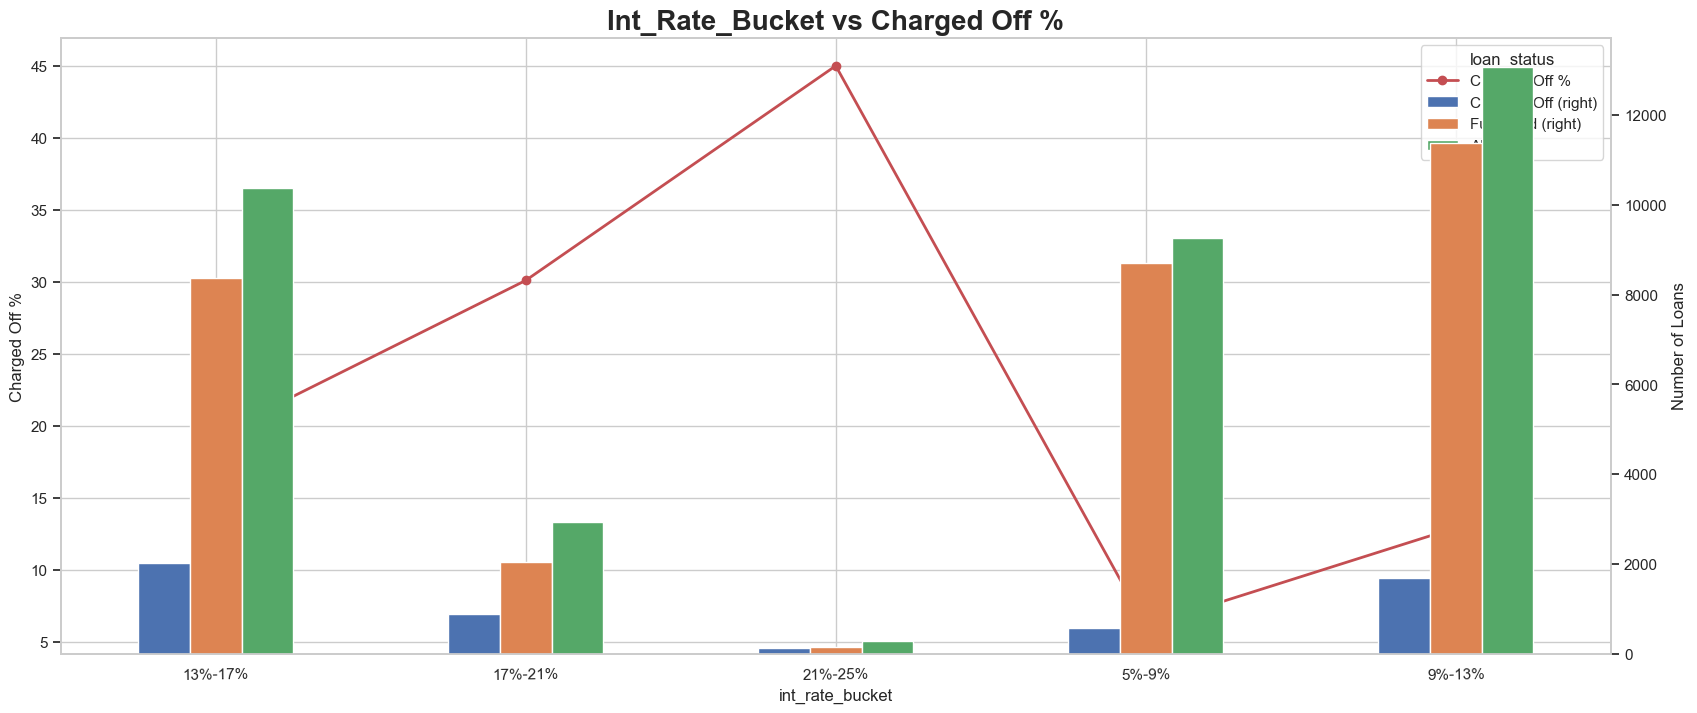

In [175]:
columns_config = {
    'grade': {},
    'sub_grade': {'stacked': True},
    'emp_length': {},
    'addr_state': {},
    'purpose': {},
    'home_ownership': {},
    'verification_status': {'stacked': True},
    'annual_inc_bucket': {'stacked': True},
    'dti_bucket': {},
    'int_rate_bucket': {}
}

for column, plot_config in columns_config.items():
    stacked = plot_config.get('stacked', False)
    plot_charged_off_percentage(data, column, stacked)

### Summary of Multivariate Analysis

- **Grade**: Loan applicants belonging to Grades **B, C, and D** have a higher likelihood of defaulting.  
- **Subgrades**: Borrowers from Subgrades **B3, B4, and B5** show the maximum tendency to default.  
- **Experience**: Loan applicants with **10 years of experience** exhibit the highest tendency to default.  
- **Geography**: Borrowers from the states **CA (California)**, **FL (Florida)**, and **NJ (New Jersey)** are most likely to default.  
- **Housing**: Borrowers with **rented house ownership** show the highest default rates.  
- **Income Groups**: Borrowers in **lower income groups** have the highest default tendencies, which generally decrease as annual income increases.  
- **Interest Rates**: The tendency to default increases with rising **interest rates**.
